### MA6202: Laboratorio de Ciencia de Datos

#### Profesor: Nicolás Caro

#### Fecha de entrega: 17/05/2020

#### Integrantes: Matías Romero, Danner Schlotterbeck, Kurt Walsen

# Tarea 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

# P1 Limpieza de datos

## Parte 1

In [2]:
# Se carga una de las semanas de la data para inspeccionar:
w13_all = pd.read_csv('./data/raw/w{}/metrocuadrado_all_w{}.csv'.format(13,13))
w13_fur= pd.read_csv('./data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(13,13))

In [3]:
# Inspeccionamos sus columnas, y notamos que son las mismas
print(w13_all.columns)
print(w13_fur.columns)
w13_all.columns==w13_fur.columns

Index(['property_type|rent_type|location', 'price', 'n_rooms', 'n_bath',
       'surface', 'details', 'url', 'metrocuadrado_index'],
      dtype='object')
Index(['property_type|rent_type|location', 'price', 'n_rooms', 'n_bath',
       'surface', 'details', 'url', 'metrocuadrado_index'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True])

Realizamos una concatenación con y sin duplicados para verificar la existencia de éstos.

In [4]:
df_con=pd.concat([w13_all,w13_fur],ignore_index=True)
df_con.head()

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1


In [5]:
# Verificamos si existen duplicados
df_con.shape[0]==df_con.drop_duplicates().shape[0] # False, luego existen.

False

Buscamos generar una variable categórica que indique si la observación correspondiente proviene de un archivo que en su nombre contiene `furnished`. Para ello haremos uso de la función merge.

Notamos que la columna que sirve de identificador es `url` pues debiese ser único para cada propiedad en arriendo. Además podemos utilizarlo como llave para hacer el merge de los dataframes y ver qué ocurre con al columna `furnished`.

De esta manera identificamos a archivos de texto `furnished` que no estén contenidos en archivos con texto `all` mediante la inspección de los valores right_only en la columna `furnished`.

In [6]:
w13_all = w13_all.drop_duplicates()
w13_fur = w13_fur.drop_duplicates()


df_mer = pd.merge(left=w13_all,right=w13_fur,on='url',how='outer',indicator='furnished')
df_mer

,property_type|rent_type|location_x,price_x,n_rooms_x,n_bath_x,surface_x,details_x,url,metrocuadrado_index_x,property_type|rent_type|location_y,price_y,n_rooms_y,n_bath_y,surface_y,details_y,metrocuadrado_index_y,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3.0,2.0,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,57.3,both
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11956,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Casa en Arriendo, SANTA HELENA I Bogotá D.C..",$3.233.000,3.0,4.0,202.0 m2,Casa tres niveles conjunto cerrado. Área de 20...,25.2,right_only
11957,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Casa en Arriendo, ATAHUALPA Bogotá D.C..",$5.500.000,4.0,3.0,220.0 m2,"Hermosa casa para sede educativa,o fundación,d...",66.8,right_only
11958,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Casa en Arriendo, JULIO FLOREZ Bogotá D.C..",$2.900.000,4.0,4.0,216.0 m2,Arriendo Casa La Floresta en dos Niveles y un ...,33.8,right_only
11959,NaN,NaN,NaN,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,NaN,"Apartamento en Arriendo, SANTA BIBIANA Bogotá ...",$1.900.000,1.0,2.0,47.0 m2,Aparta-estudio amoblado en arriendo sector res...,37.5,right_only


Para w13 podemos notar 5 de éstos casos. Pero hay que verlo para el caso general.

In [7]:
fur=df_mer.drop_duplicates()[['url','furnished']]
fur[fur['furnished']=='right_only']

,url,furnished
11956,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11957,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11958,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11959,https://www.metrocuadrado.com/inmueble/arriend...,right_only
11960,https://www.metrocuadrado.com/inmueble/arriend...,right_only


Ahora, agregamos al dataframe de concatenación la columna con la variable categórica furnished, mediante el uso de merge nuevamente.

In [8]:
df_con = df_con.drop_duplicates()
pd.merge(df_con,fur,on='url').drop_duplicates()

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,left_only
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both
2,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,both
3,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,left_only
4,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,left_only
...,...,...,...,...,...,...,...,...,...
13561,"Casa en Arriendo, SANTA HELENA I Bogotá D.C..",$3.233.000,3,4,202.0 m2,Casa tres niveles conjunto cerrado. Área de 20...,https://www.metrocuadrado.com/inmueble/arriend...,25.2,right_only
13562,"Casa en Arriendo, ATAHUALPA Bogotá D.C..",$5.500.000,4,3,220.0 m2,"Hermosa casa para sede educativa,o fundación,d...",https://www.metrocuadrado.com/inmueble/arriend...,66.8,right_only
13563,"Casa en Arriendo, JULIO FLOREZ Bogotá D.C..",$2.900.000,4,4,216.0 m2,Arriendo Casa La Floresta en dos Niveles y un ...,https://www.metrocuadrado.com/inmueble/arriend...,33.8,right_only
13564,"Apartamento en Arriendo, SANTA BIBIANA Bogotá ...",$1.900.000,1,2,47.0 m2,Aparta-estudio amoblado en arriendo sector res...,https://www.metrocuadrado.com/inmueble/arriend...,37.5,right_only


Se compara con la data sin la columna agregada, se observa que poseen la misma cantidad de registros.

In [9]:
df_con

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1
...,...,...,...,...,...,...,...,...
13612,"Apartamento en Arriendo, SANTA BARBARA OCCIDEN...",$4.500.000,2,3,136.0 m2,"EXCELENTE APARTAMENTO AMOBLADO, ALCOBAS CON PI...",https://www.metrocuadrado.com/inmueble/arriend...,64.1
13613,"Apartamento en Arriendo, SANTA BARBARA OCCIDEN...",$4.390.000,2,3,110.0 m2,amoblado con terraza.,https://www.metrocuadrado.com/inmueble/arriend...,64.2
13614,"Apartamento en Arriendo, ANTIGUO COUNTRY Bogot...",$4.500.000,2,3,120.0 m2,"Lindo apto en el sector de Chico Virrey, cerca...",https://www.metrocuadrado.com/inmueble/arriend...,55.4
13615,"Apartamento en Arriendo, MOLINOS NORTE Bogotá ...",$4.100.000,2,3,114.0 m2,"Hermoso apto, rodeado de verde por todos lados...",https://www.metrocuadrado.com/inmueble/arriend...,59.1


In [10]:
w13_fur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 8 columns):
property_type|rent_type|location    1610 non-null object
price                               1610 non-null object
n_rooms                             1609 non-null float64
n_bath                              1607 non-null float64
surface                             1610 non-null object
details                             1602 non-null object
url                                 1610 non-null object
metrocuadrado_index                 1610 non-null float64
dtypes: float64(3), object(5)
memory usage: 113.2+ KB


In [11]:
w13_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11956 entries, 0 to 12006
Data columns (total 8 columns):
property_type|rent_type|location    11956 non-null object
price                               11956 non-null object
n_rooms                             11931 non-null object
n_bath                              11771 non-null object
surface                             11956 non-null object
details                             11862 non-null object
url                                 11956 non-null object
metrocuadrado_index                 11956 non-null float64
dtypes: float64(1), object(7)
memory usage: 840.7+ KB


In [12]:
# Para unificar formatos, pasamos las columnas 'n_rooms' y 'n_bath' de _fur a string.
w13_fur.n_rooms=w13_fur.n_rooms.astype(str)
w13_fur.n_bath=w13_fur.n_bath.astype(str)
w13_fur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 8 columns):
property_type|rent_type|location    1610 non-null object
price                               1610 non-null object
n_rooms                             1610 non-null object
n_bath                              1610 non-null object
surface                             1610 non-null object
details                             1602 non-null object
url                                 1610 non-null object
metrocuadrado_index                 1610 non-null float64
dtypes: float64(1), object(7)
memory usage: 113.2+ KB


Ahora, realizamos el proceso general para todas las semanas disponibles en la data.

In [13]:
# Se concatenan todos los _all
df_all = pd.concat([pd.read_csv('./data/raw/w{}/metrocuadrado_all_w{}.csv'.format(i,i)) for i in range(13,18)])
print('Número de registros en df_all: '+str(len(df_all)))
df_all.drop_duplicates(inplace=True)
print('Número de registros en df_all sin duplicados: '+str(len(df_all)))

# Se concatenan todos los _fur
df_fur = pd.concat([pd.read_csv('./data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(i,i)) for i in range(13,18)])
print('Número de registros en df_fur: '+str(len(df_fur)))
df_fur.drop_duplicates(inplace=True)
df_fur.reset_index()
print('Número de registros en df_fur sin duplicados: '+str(len(df_fur)))

furnished_only = df_fur.query("url not in @df_all.url")
print("Observaciones de archivos con texto 'furnished' que no estén\n contenidos en archivos con texto 'all': ",
      len(furnished_only))
# Se agregan los que estan solo en furnished
df = pd.concat([df_all, df_fur.query("url not in @df_all.url")],ignore_index=True)

# Se crea columna dummy y se le asigna valor 1 a los que se encontraban en archivos furnished
from_furnished = df.query("url in @df_fur.url").index
df.loc[:, 'furnished'] = np.zeros(len(df), dtype=int)
df.loc[from_furnished, 'furnished'] = 1

Número de registros en df_all: 57167
Número de registros en df_all sin duplicados: 16295
Número de registros en df_fur: 7850
Número de registros en df_fur sin duplicados: 2099
Observaciones de archivos con texto 'furnished' que no estén
 contenidos en archivos con texto 'all':  4


In [14]:
df

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0
3,"Casa en Arriendo, PARIS GAITAN Bogotá D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0
4,"Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0
...,...,...,...,...,...,...,...,...,...
16294,"Apartamento en Arriendo, CHICO NORTE III Bogot...",$2.750.000,1,2,57.0 m2,Apartamento de una alcoba. Edificio Naia (Ca...,https://www.metrocuadrado.com/inmueble/arriend...,81.1,1
16295,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.750.000,3,2,117.0 m2,Hermosa casa amoblada en arriendo ubicada en e...,https://www.metrocuadrado.com/inmueble/arriend...,66.4,1
16296,"Apartamento en Arriendo, LOS CEDRITOS Bogotá D...",$2.300.000,1,1,48.0 m2,Arriendo apartamento amoblado nuevo moderno ti...,https://www.metrocuadrado.com/inmueble/arriend...,72.7,1
16297,"Apartamento en Arriendo, SANTA BIBIANA Bogotá ...",$2.600.000,1,2,60.0 m2,"Se arrienda precioso apartamento amoblado, con...",https://www.metrocuadrado.com/inmueble/arriend...,63.4,1


## Parte 2

Se procede a limpiar parte de la data, esto incluye cambiar el formato de ciertas variables de interés. En particular:

`price` : Se decidió expresar la columna de precios como un número flotante, para evitar posibles futuras complicaciones en la inferencia estadística.
            
`surface` : Se modificaron los valores para que representen el valor en metros cuadrados como número flotante.
            
`n_rooms` : Se decidió expresar la columna de número de habitaciones como str, pues debido a la forma de los valores en esta columna es posible categorizarlas en base a la cantidad de habitacioens que registra, de esta manera los datos del tipo '5+' serán parte de una única categoría.

`n_bath` : Análogo a `n_rooms`.

In [15]:
# Se actualiza la columna 'price'
df['price'] = df['price'].str.replace('.','').str.strip('$').map(float)

# Se actualiza la columna 'surface'
df['surface'] = df['surface'].replace('m2', '', regex=True).map(float)

# Se genera un diccionario de reemplazos
repl_dic = {1.0:'1',2.0:'2',3.0:'3',4.0:'4',5.0:'5'}

# Se actualizan las columnas 'n_rooms' y 'n_bath'
df['n_rooms'] = df['n_rooms'].replace(repl_dic)
df['n_bath'] = df['n_bath'].replace(repl_dic)

Notamos que existen registros en los cuales `surface` es 0, lo cual puede traer problemas a futuro.

In [16]:
zero_surf=df[df['surface'] == 0][['price','surface']]
nonzero_surf=df[df['surface'] > 0][['price','surface']]
print("Total de registros: ",len(df))
print("Registros con 'surface'=0 : ",len(zero_surf))
print("Registros con 'surface'>0 : ",len(nonzero_surf))
zero_surf

Total de registros:  16299
Registros con 'surface'=0 :  16
Registros con 'surface'>0 :  16283


,price,surface
4014,1614000.0,0.0
5170,685121.0,0.0
5171,1062754.0,0.0
5293,583945.0,0.0
5424,333123.0,0.0
5425,1400000.0,0.0
5564,1317950.0,0.0
5655,2743261.0,0.0
5800,442023.0,0.0
5819,462441.0,0.0


Luego podemos considerar estos datos como faltantes, pues en la práctica no existen propiedades de 0 m2 con tales precios.

In [17]:
# Actualizamos 'surface'
df.loc[:,'surface'] = df['surface'].replace(float(0),np.nan)

# Verificamos que el cambio se realizó correctamente
df[df['surface'].isnull()][['price','surface']]

,price,surface
4014,1614000.0,NaN
5170,685121.0,NaN
5171,1062754.0,NaN
5293,583945.0,NaN
5424,333123.0,NaN
5425,1400000.0,NaN
5564,1317950.0,NaN
5655,2743261.0,NaN
5800,442023.0,NaN
5819,462441.0,NaN


Se procede a separar el contenido de la columna `property_type|rent_type|location` en tres nuevas columnas `property_type`, `rent_type` y `location`.

In [18]:
# Preparamos la columna a tratar
newcols = df['property_type|rent_type|location'].str.split(pat= ',',expand=True)

# Se generan las nuevas columnas
df['location'] = newcols[1]
df[['property_type','rent_type']]=newcols[0].str.lower().str.split(pat=' ',n=1,expand=True)
df.loc[:,'rent_type'] = df['rent_type'].str.lstrip('en ')

# Fijamos las columnas de df en orden
cols = ['property_type', 'rent_type', 'location', 'price', 'n_rooms',
        'n_bath', 'surface', 'details', 'url', 'metrocuadrado_index',
        'furnished']

# Actualizamos df
df = df[cols]

## Parte 3

Se procede a agregar las columnas 'price_per_m2' y 'n_garajes',donde:

`price_per_m2` : Representa el precio por metro cuadrado.

`n_garajes` : Representa el número de garajes.

In [19]:
# Generamos la nueva columna 'price_per_m2' 
df.loc[:,'price_per_m2'] = df['price'] / df['surface']

Para `n_garajes` fue un proceso más complejo. Notamos que el string asociado a cada elemento en `url` es de la siguiente forma:

In [20]:
print(df['url'][0])

https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-la-soledad-norte-3-habitaciones-2-banos-1-garajes/35-M1919


Sin embargo, este no es el caso de todas las `url`. En particular:

In [21]:
print(df['url'][3])

https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-paris-gaitan-5-habitaciones-4-banos/OCHE-04552802


Luego, una manera intuitiva de obtener el número de garajes es separar el string con el separador '-garajes' lo cual generará una lista de dos strings, luego podemos acceder al primer string de la lista y extraer el último elemento, recuperando así el número de garajes. Lo cual nos entrega los siguientes valores para `n_garajes`:

In [22]:
df['n_garajes'] = df['url'].map(lambda string: string.split(sep='-garajes')[0][-1])

df['n_garajes'].unique()

array(['1', '4', '2', '3', '8', '9', '5', '6', '7', '0', '+'],
      dtype=object)

Notamos que aparece un elemento de la forma '+', luego al igual que `n_rooms` y `n_bath`, existe una categoria que representa una cantidad superior a cierto valor, la intuición nos dice que tal categoria corresponde a '9+'. En búsqueda de generalizar la transformación(y así incluir éste tipo de categorías) se uso una lambda function distinta, dando como resultado lo siguiente:

In [23]:
df['n_garajes'] = df['url'].map(lambda string: string.split(sep='-garajes')[0][-1] if string.split(sep='-garajes')[0][-1] !='+' else string.split(sep='-garajes')[0][-2:])
df['n_garajes'].unique()

array(['1', '4', '2', '3', '8', '9', '5', '6', '7', '0', '4+'],
      dtype=object)

Ésto nos muestra que la única categoria de la forma antes descrita corresponde solamente a '4+', algo confuso pues ya existen las categorías 5:9. Notamos que la cantidad de datos que corresponden a éste tipo de categoría son 9. 

In [24]:
print(len(df['n_garajes'][df['n_garajes']=='4+']))

9


Veamos ahora cúantos corresponden a las categorías >4, notamos que corresponden a 1010(bastante mayor en comparación a '4+').

In [25]:
print(len(df['n_garajes'][df['n_garajes']>'4']))

1010


Sin embargo, notamos que la cantidad de datos que pueden representarse en la categoría '4+' corresponden a 1010(notar que al computar '4+'>'4' nos entrega True), una cifra bastante menor a los 16299 datos totales de los cuales disponemos, más precisamente, tenemos que las variables que superan la categoría '4' corresponden en promedio a 1010/6=168.3 por categoría, mientras que las variables en categoría '4' o inferior corresponden en promedio a (16299-1010)/5=3057.8 por categoría. En base a ésto, es correcto aseverar que podemos agrupar las variables con categoria superior a '4' en una única categoría '4+', sin perder variabilidad en el feature 'n_garajes'. Por lo tanto, generamos un diccionario que mapee todos las categorias resultantes superiores a '4' en una única categoría '4+'.

In [26]:
# Se genera diccionario de mapeos
map_dict={'+':'4+', '5':'4+', '6':'4+', '7':'4+', '8':'4+', '9':'4+'}

# Se genera la correcta columna 'n_garajes'
df['n_garajes'] = df['url'].map(lambda string: string[
    string.find('-garajes')-1] if string.find('-garajes') > 0 else np.nan )
df['n_garajes'] = df['n_garajes'].replace(map_dict)
df['n_garajes'].unique()

array(['1', nan, '2', '4', '3', '4+'], dtype=object)

In [27]:
# Fijamos el orden de las columnas en df.
cols = ['property_type', 'rent_type', 'location', 'price','price_per_m2', 
        'n_rooms', 'n_bath', 'n_garajes','surface', 'details', 'url', 
        'metrocuadrado_index', 'furnished']

# Reordenamos df.
df = df[cols]

In [28]:
df

,property_type,rent_type,location,price,price_per_m2,n_rooms,n_bath,n_garajes,surface,details,url,metrocuadrado_index,furnished
0,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,1050000.0,16666.666667,3,2,1,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0
1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3930000.0,39300.000000,3,2,1,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1
2,casa,arriendo,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,750000.0,8333.333333,3,1,NaN,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0
3,casa,arriendo,PARIS GAITAN Bogotá D.C..,3400000.0,47887.323944,5,4,NaN,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0
4,casa,arriendo,BALCONES DE ORIENTE Bogotá D.C..,1560000.0,16250.000000,4,3,1,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,apartamento,arriendo,CHICO NORTE III Bogotá D.C..,2750000.0,48245.614035,1,2,1,57.0,Apartamento de una alcoba. Edificio Naia (Ca...,https://www.metrocuadrado.com/inmueble/arriend...,81.1,1
16295,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3750000.0,32051.282051,3,2,NaN,117.0,Hermosa casa amoblada en arriendo ubicada en e...,https://www.metrocuadrado.com/inmueble/arriend...,66.4,1
16296,apartamento,arriendo,LOS CEDRITOS Bogotá D.C..,2300000.0,47916.666667,1,1,1,48.0,Arriendo apartamento amoblado nuevo moderno ti...,https://www.metrocuadrado.com/inmueble/arriend...,72.7,1
16297,apartamento,arriendo,SANTA BIBIANA Bogotá D.C..,2600000.0,43333.333333,1,2,1,60.0,"Se arrienda precioso apartamento amoblado, con...",https://www.metrocuadrado.com/inmueble/arriend...,63.4,1


## Parte 4

Queremos categorizar los productos disponibles en la data según el tipo de inmueble al que corresponde y la cantidad de m2 de superficie que poseen, para ello haremos uso de 8 categorias:

1 : `rent_type` = `casa` , 80 <= `surface` < 120

2 : `rent_type` = `casa` , 120 <= `surface` < 180

3 : `rent_type` = `casa` , 180 <= `surface` < 

4 : `rent_type` = `casa` , 240 <= `surface` < 360

5 : `rent_type` = `casa` , 360 <= `surface` < 

6 : `rent_type` = `apartamento` , 40 <= `surface` < 60

7 : `rent_type` = `apartamento` , 60 <= `surface` < 80

8 : `rent_type` = `apartamento` , 80 <= `surface` < 120

In [29]:
# Se crea columna para ser rellenada a posteriori
df['product_type'] = np.repeat([np.nan], len(df))

# Se rellenan los tipos para las casas
cotas_casas = [(80, 120), (120, 180), (180, 240), (240, 360), 
               (360,460)]

for i in range(len(cotas_casas)):
    q = "(property_type == 'casa') & ({0} < surface <= {1})".format(*cotas_casas[i])
    idx = df.query(q).index
    df.loc[idx, 'product_type'] = str(i+1)

# Se rellenan los tipos para apartamentos    
cotas_apartamentos = [(40, 60), (60, 80), (80, 120)]

for i in range(len(cotas_apartamentos)):
    q = "(property_type == 'apartamento') & ({0} < surface <= {1})".format(*cotas_apartamentos[i])
    idx = df.query(q).index
    df.loc[idx, 'product_type'] = str(i+(len(cotas_casas)+1))
    
print('Cantidad de productos no clasificados: '
      ,len(df[df['product_type'].isna()]))
print('Categorías: ',df['product_type'].unique())

Cantidad de productos no clasificados:  2953
Categorías:  [nan '1' '2' '3' '4' '5' '6' '7' '8']


In [30]:
df

,property_type,rent_type,location,price,price_per_m2,n_rooms,n_bath,n_garajes,surface,details,url,metrocuadrado_index,furnished,product_type
0,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,1050000.0,16666.666667,3,2,1,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,NaN
1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3930000.0,39300.000000,3,2,1,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1,1
2,casa,arriendo,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,750000.0,8333.333333,3,1,NaN,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,1
3,casa,arriendo,PARIS GAITAN Bogotá D.C..,3400000.0,47887.323944,5,4,NaN,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,NaN
4,casa,arriendo,BALCONES DE ORIENTE Bogotá D.C..,1560000.0,16250.000000,4,3,1,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,apartamento,arriendo,CHICO NORTE III Bogotá D.C..,2750000.0,48245.614035,1,2,1,57.0,Apartamento de una alcoba. Edificio Naia (Ca...,https://www.metrocuadrado.com/inmueble/arriend...,81.1,1,6
16295,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,3750000.0,32051.282051,3,2,NaN,117.0,Hermosa casa amoblada en arriendo ubicada en e...,https://www.metrocuadrado.com/inmueble/arriend...,66.4,1,1
16296,apartamento,arriendo,LOS CEDRITOS Bogotá D.C..,2300000.0,47916.666667,1,1,1,48.0,Arriendo apartamento amoblado nuevo moderno ti...,https://www.metrocuadrado.com/inmueble/arriend...,72.7,1,6
16297,apartamento,arriendo,SANTA BIBIANA Bogotá D.C..,2600000.0,43333.333333,1,2,1,60.0,"Se arrienda precioso apartamento amoblado, con...",https://www.metrocuadrado.com/inmueble/arriend...,63.4,1,6


## Parte 5

Queremos generar una nueva columna que indique el barrio, a partir de location. Notamos que todas las location poseen la estructuca '{barrio} Bogotá D.C.'

In [31]:
df.location.unique()[:20]

array([' LA SOLEDAD NORTE Bogotá D.C..',
       ' CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..',
       ' VILLA DE LOS ALPES II SECTOR Bogotá D.C..',
       ' PARIS GAITAN Bogotá D.C..', ' BALCONES DE ORIENTE Bogotá D.C..',
       ' TIBABUYES Bogotá D.C..', ' PORTALES DEL NORTE Bogotá D.C..',
       ' URBANIZACION BOLIVIA ORIENTAL Bogotá D.C..',
       ' URBANIZACION AZAFRANES Bogotá D.C..',
       ' URBANIZACION EL CORTIJO Bogotá D.C..',
       ' CAMPO ALEGRE Bogotá D.C..', ' SANTA ANA ORIENTAL Bogotá D.C..',
       ' HIPOTECHO II Bogotá D.C..', ' MIRANDELA Bogotá D.C..',
       ' COSTA AZUL Bogotá D.C..', ' CANTALEJO Bogotá D.C..',
       ' NORMANDIA OCCIDENTAL Bogotá D.C..', ' LOS PANTANOS Bogotá D.C..',
       ' BOSQUES DE MARIANA Bogotá D.C..',
       ' BOSQUE DE PINOS Bogotá D.C..'], dtype=object)

Verificamos si hay locations que no contengan esta keyword, notamos que todos la tienen.

In [32]:
df[df['location'].map(lambda string: not('Bogotá D.C.' in string))]

,property_type,rent_type,location,price,price_per_m2,n_rooms,n_bath,n_garajes,surface,details,url,metrocuadrado_index,furnished,product_type


Procedemos a generar la columna `barrio`, de manera similar a como 
obtuvimos la columna `n_garajes`.

In [33]:
df.loc[df.index, 'barrio'] = df['location'].map(lambda string: 
                                                string.split(sep='Bogotá')[0].strip(' ').lower())
print('Cantidad única de barrios disponibles: ',len(df['barrio'].unique()))
df[['location','barrio']].head()

Cantidad única de barrios disponibles:  631


,location,barrio
0,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte
1,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental
2,VILLA DE LOS ALPES II SECTOR Bogotá D.C..,villa de los alpes ii sector
3,PARIS GAITAN Bogotá D.C..,paris gaitan
4,BALCONES DE ORIENTE Bogotá D.C..,balcones de oriente


In [34]:
# Se examina barrio-upz.csv para determinar cómo hacer el merge
upz=pd.read_csv('./data/asignacion_upz/barrio-upz.csv')
upz.head(10)

,UPlCodigo,UPlTipo,UPlNombre,UPlArea,pro_location
0,UPZ100,1,GALERIAS,2.375681e+06,palermo
1,UPZ100,1,GALERIAS,2.375681e+06,belalcazar
2,UPZ100,1,GALERIAS,2.375681e+06,sears
3,UPZ100,1,GALERIAS,2.375681e+06,galerias
4,UPZ100,1,GALERIAS,2.375681e+06,banco central
5,UPZ100,1,GALERIAS,2.375681e+06,el campin
6,UPZ83,1,LAS MARGARITAS,1.472415e+06,san jose
7,UPZ83,1,LAS MARGARITAS,1.472415e+06,las margaritas
8,UPZ107,1,QUINTA PAREDES,1.739560e+06,centro nariño
9,UPZ107,1,QUINTA PAREDES,1.739560e+06,gran america


In [35]:
print('Cantidad única de UPlNombre disponibles: ',len(upz.UPlNombre.unique()))
upz.UPlNombre.unique()[:20]

Cantidad única de UPlNombre disponibles:  112


array(['GALERIAS', 'LAS MARGARITAS', 'QUINTA PAREDES', 'TEUSAQUILLO',
       'SAGRADO CORAZON', 'GRAN BRITALIA', 'ZONA INDUSTRIAL', 'FONTIBON',
       'DOCE DE OCTUBRE', 'MODELIA', 'PARQUE SALITRE', 'JARDIN BOTANICO',
       'EL REFUGIO', 'SUBA', 'BOLIVIA', 'COUNTRY CLUB', 'SANTA BARBARA',
       'LOS ANDES', 'SAN ISIDRO - PATIOS', 'LA ESMERALDA'], dtype=object)

In [36]:
print('Cantidad única de pro_location disponibles: ',len(upz.pro_location.unique()))
upz.pro_location.unique()[:20]

Cantidad única de pro_location disponibles:  457


array(['palermo', 'belalcazar', 'sears', 'galerias', 'banco central',
       'el campin', 'san jose', 'las margaritas', 'centro nariño',
       'gran america', 'acevedo tejada', 'el recuerdo', 'quinta paredes',
       'salitre i', 'armenia', 'la victoria', 'cantagallo',
       'centro administrativo', 'la soledad', 'santa teresa'],
      dtype=object)

Notamos que `pro_location` presenta una gama más amplia de barrios sobre los cuales poder cruzar la data. En base a esto, haremos un cruce entre df y asignacion_upz.

In [37]:
# Se realiza un merge 'outer' para determinar cuántos no tienen código upz
df_merged = pd.merge(df,upz,left_on='barrio',right_on='pro_location',
                     how='outer',indicator='ind')

barrios_upz = df_merged[df_merged['ind']=='right_only']['UPlNombre'].nunique()
obs_sin = len(df_merged[df_merged['ind']=='left_only'])
print('Barrios con código UPZ que no están en df: '+str(barrios_upz))
print('Observaciones sin código UPZ: '+str(obs_sin))
print('Barrios sin código UPZ: '+str(df_merged[df_merged['ind']=='left_only'].barrio.nunique()))
porc = int(100*len(df_merged[df_merged['ind']=='both'])/len(df))
print('El {}% de las observaciones tienen código UPZ'.format(porc))


Barrios con código UPZ que no están en df: 13
Observaciones sin código UPZ: 1946
Barrios sin código UPZ: 176
El 88% de las observaciones tienen código UPZ


Notamos que existen 13 barrios de la data upz los cuales no aparecen en nuestro df, ésto se quizás a que no existen publicaciones de arriendo/venta de propiedades pertenecientes a tales barrios. Además, se observa que 1946 registros pertenecen a barrios los cuales no se les puede adjuntar un código UPZ. De éstos notamos que la cantidad única de barrios corresponde a 176. Además, un 88% de las observaciones en df poseen
un código UPZ.

In [38]:
# Se define el nuevo df
#df = df_merged[df_merged['ind']=='both'].drop(columns=['UPlTipo','UPlNombre','ind','pro_location'])
df = df_merged[df_merged['ind']!='right_only'].drop(columns=['UPlTipo','UPlNombre','ind','pro_location'])

df.reset_index(drop=True)

# Fijamos las columnas en df.
cols = ['product_type','property_type', 'rent_type', 'location','barrio','UPlCodigo',
        'UPlArea', 'price','price_per_m2','surface', 'n_rooms', 'n_bath',
        'n_garajes', 'details', 'url', 'metrocuadrado_index', 'furnished']

df = df[cols]

In [39]:
df

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,n_rooms,n_bath,n_garajes,details,url,metrocuadrado_index,furnished
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,3,2,1,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0.0
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,1,1,NaN,"Apartaestudio,un baño, cuarto piso, no tiene p...",https://www.metrocuadrado.com/inmueble/arriend...,32.5,0.0
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,1,1,NaN,"5858-Apartaestudio,un baño, cuarto piso, no ti...",https://www.metrocuadrado.com/inmueble/arriend...,31.8,0.0
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,3,2,1,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,1.0
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,2,3,1,"SAUNA, ALCOBA dos, ALCOBA SERVICIO, SALACOMEDO...",https://www.metrocuadrado.com/inmueble/arriend...,38.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,1,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,34.9,0.0
16295,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,1,NaN,NaN,NaN,https://www.metrocuadrado.com/inmueble/arriend...,38.3,0.0
16296,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,1,1,NaN,Apartaestudio en el barrio policarpa excelente...,https://www.metrocuadrado.com/inmueble/arriend...,31.4,0.0
16297,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,1,1,NaN,Apartaestudio en el barrio policarpa consta de...,https://www.metrocuadrado.com/inmueble/arriend...,48.5,0.0


## Parte 6

In [40]:
# Cargamos la data asociada a estadisticas_poblacion.csv
stats_pob=pd.read_csv('./data/estadisticas_upz/estadisticas_poblacion.csv')
stats_pob.head()

,Unnamed: 0,upz,nomupz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc
0,0,UPZ11,SAN CRISTOBAL NORTE,68430,0.6,3.9,20.7,35.2,44.579934,17.931973
1,1,UPZ12,TOBERIN,50037,1.8,16.7,9.1,54.7,36.279630,5.420442
2,2,UPZ13,LOS CEDROS,102981,0.0,3.5,5.5,118.4,33.286852,3.250000
3,3,UPZ18,BRITALIA,69961,0.4,7.2,9.4,42.7,36.465059,9.439051
4,4,UPZ19,EL PRADO,121158,0.3,8.0,8.2,59.1,32.887202,5.406574


In [41]:
# Estructura columna de UPlCodigo para la data stats_pob, a priori
# no se observas complicaciones en el formato.
stats_pob.upz.unique()

array(['UPZ11', 'UPZ12', 'UPZ13', 'UPZ18', 'UPZ19', 'UPZ21', 'UPZ23',
       'UPZ24', 'UPZ26', 'UPZ27', 'UPZ28', 'UPZ29', 'UPZ30', 'UPZ32',
       'UPZ33', 'UPZ34', 'UPZ35', 'UPZ37', 'UPZ38', 'UPZ39', 'UPZ40',
       'UPZ41', 'UPZ42', 'UPZ43', 'UPZ44', 'UPZ45', 'UPZ47', 'UPZ48',
       'UPZ49', 'UPZ50', 'UPZ51', 'UPZ52', 'UPZ54', 'UPZ55', 'UPZ57',
       'UPZ58', 'UPZ62', 'UPZ65', 'UPZ66', 'UPZ67', 'UPZ69', 'UPZ70',
       'UPZ71', 'UPZ72', 'UPZ73', 'UPZ74', 'UPZ75', 'UPZ76', 'UPZ77',
       'UPZ78', 'UPZ79', 'UPZ80', 'UPZ81', 'UPZ82', 'UPZ83', 'UPZ84',
       'UPZ85', 'UPZ86', 'UPZ87', 'UPZ89', 'UPZ92', 'UPZ94', 'UPZ95',
       'UPZ96', 'UPZ98', 'UPZ100', 'UPZ101', 'UPZ102', 'UPZ107', 'UPZ109',
       'UPZ110', 'UPZ112', 'UPZ114', 'UPZ53', 'UPZ36', 'UPZ46', 'UPZ113',
       'UPZ16', 'UPZ15', 'UPZ14', 'UPZ9', 'UPZ1', 'UPZ10', 'UPZ25',
       'UPZ20', 'UPZ2', 'UPZ3', 'UPZ17', 'UPZ103', 'UPZ22', 'UPZ104',
       'UPZ106', 'UPZ108', 'UPZ111', 'UPZ31', 'UPZ116', 'UPZ105', 'UPZ59',
       '

In [42]:
# Rescatamos solo las columnas relevantes
stats_pob.drop(columns=['Unnamed: 0','nomupz'],inplace=True)
df_merged = pd.merge(df,stats_pob,left_on='UPlCodigo',right_on='upz',how='left')
df_merged

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,...,metrocuadrado_index,furnished,upz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,...,25.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,32.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,31.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,...,57.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,...,38.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16294,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,...,34.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16295,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,...,38.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16296,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,...,31.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,...,48.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Cargamos la data asociada a indice_inseguridad.csv
ind_inseg=pd.read_csv('./data/estadisticas_upz/indice_inseguridad.csv')
ind_inseg.head()

,Unnamed: 0,UPlCodigo,UPlNombre2,indice_inseguridad
0,0,UPZ100,GALERIAS,0.671141
1,1,UPZ83,LAS MARGARITAS,0.000000
2,2,UPZ107,QUINTA PAREDES,2.318841
3,3,UPZ101,TEUSAQUILLO,3.629032
4,4,UPZ91,SAGRADO CORAZON,13.537118


In [44]:
# Notamos que hay códigos '1', '3', '4' y '5', pero también notamos
# que éstos UPZ{} no están en df ni coinciden con otros, por lo que 
# los ignoramos.
print('Códigos UPZ en ind_inseg: ',ind_inseg.UPlCodigo.unique())
ind_inseg.drop(columns=['Unnamed: 0','UPlNombre2'],inplace=True)
df_merged = pd.merge(df_merged,ind_inseg,on='UPlCodigo',how='left')

Códigos UPZ en ind_inseg:  ['UPZ100' 'UPZ83' 'UPZ107' 'UPZ101' 'UPZ91' 'UPZ81' 'UPZ108' 'UPZ75'
 'UPZ22' 'UPZ114' 'UPZ103' 'UPZ105' 'UPZ88' 'UPZ27' 'UPZ72' 'UPZ15'
 'UPZ16' 'UPZ21' 'UPZ89' 'UPZ106' 'UPZ86' 'UPZ82' 'UPZ99' 'UPZ109' 'UPZ90'
 'UPZ33' 'UPZ111' 'UPZ102' 'UPZ45' 'UPZ93' 'UPZ37' 'UPZ49' 'UPZ19' 'UPZ24'
 'UPZ23' 'UPZ110' 'UPZ104' 'UPZ31' 'UPZ68' 'UPZ64' 'UPZ71' 'UPZ29' 'UPZ76'
 'UPZ3' 'UPZ80' 'UPZ67' 'UPZ63' 'UPZ55' 'UPZ51' 'UPZ60' 'UPZ56' 'UPZ65'
 'UPZ2' 'UPZ17' 'UPZ18' 'UPZ26' 'UPZ115' 'UPZ50' 'UPZ20' 'UPZ79' 'UPZ12'
 'UPZ10' 'UPZ59' 'UPZ58' 'UPZ43' 'UPZ47' 'UPZ48' 'UPZ113' 'UPZ44' 'UPZ13'
 'UPZ70' 'UPZ36' 'UPZ66' 'UPZ57' 'UPZ52' 'UPZ11' 'UPZ14' 'UPZ73' 'UPZ74'
 'UPZ25' 'UPZ97' 'UPZ98' 'UPZ96' 'UPZ92' 'UPZ94' 'UPZ9' 'UPZ28' 'UPZ30'
 'UPZ116' 'UPZ35' 'UPZ38' 'UPZ41' 'UPZ40' 'UPZ34' 'UPZ84' 'UPZ85' 'UPZ32'
 'UPZ95' 'UPZ87' 'UPZ1' 'UPZ46' 'UPZ112' 'UPZ78' 'UPZ117' 'UPZ77' 'UPZ54'
 'UPZ39' 'UPZ62' 'UPZ53' 'UPZ69' 'UPZ61' 'UPZ42' '3' '4' '5' '1']


In [45]:
df_merged

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,...,furnished,upz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Cargamos la data asociada a porcentaje_areas_verdes.csv
perc_areas_verdes = pd.read_csv('./data/estadisticas_upz/porcentaje_areas_verdes.csv')
perc_areas_verdes.head()

,Unnamed: 0,cod_upz,upz,areas_verdes_perc
0,0,51.0,Los Libertadores,58.196667
1,1,87.0,Tintal Sur,85.924848
2,2,1.0,Paseo de los Libertadores,83.966495
3,3,64.0,Monte Blanco,85.778144
4,4,29.0,Minuto de Dios,37.852289


In [47]:
# Estructura columna de UPlCodigo para la data perc_areas_verdes,
# notamos que contiene solo floats, sin el prefijo 'UPZ'
print('Previo a la transformación:\n',perc_areas_verdes['cod_upz'].unique())
# Se tranforma x en str de la forma 'UPZ'+str(int(x))
perc_areas_verdes.loc[:,'cod_upz']=perc_areas_verdes['cod_upz'].map(lambda x: 'UPZ'+str(int(x)))
print('Luego de la transformación:\n',perc_areas_verdes['cod_upz'].unique())

# Se dropean columnas innecesarias y se hace un último merge
perc_areas_verdes.drop(columns=['Unnamed: 0','upz'],inplace=True)
df_merged = pd.merge(df_merged,perc_areas_verdes,left_on='UPlCodigo',right_on='cod_upz',how='left')

Previo a la transformación:
 [ 51.  87.   1.  64.  29.  80.  65.  17.  31.  68.  28.  35.  38.  40.
  71.  76.   3.  67.  84.  85.  63.  55. 107. 101.  81. 108.  22. 105.
  88.  15.  89.  47.  91.  75. 114.  70.  36. 103.  27.  48. 113.  39.
  11.  14.  97.  98.  96.  92.  94.  46.  60.  56.   2.  18. 112.  78.
  26.  50.  79.  61.  10.  58.  43.  44.  13. 115.  62.  77.  54. 600.
  20.  12.  69.  59. 100.  83.  42.  19.  23.  72.  16.  21.  90.  33.
  53.  66.  57.  52.  93.  24. 110. 104. 106.  86.  82.  99. 109. 111.
  73.  74.  25. 102.  45.  37.  49. 116.  41.  34.  32.  95. 117.   9.
  30.]
Luego de la transformación:
 ['UPZ51' 'UPZ87' 'UPZ1' 'UPZ64' 'UPZ29' 'UPZ80' 'UPZ65' 'UPZ17' 'UPZ31'
 'UPZ68' 'UPZ28' 'UPZ35' 'UPZ38' 'UPZ40' 'UPZ71' 'UPZ76' 'UPZ3' 'UPZ67'
 'UPZ84' 'UPZ85' 'UPZ63' 'UPZ55' 'UPZ107' 'UPZ101' 'UPZ81' 'UPZ108'
 'UPZ22' 'UPZ105' 'UPZ88' 'UPZ15' 'UPZ89' 'UPZ47' 'UPZ91' 'UPZ75' 'UPZ114'
 'UPZ70' 'UPZ36' 'UPZ103' 'UPZ27' 'UPZ48' 'UPZ113' 'UPZ39' 'UPZ11' 'UPZ14'
 'UPZ

In [48]:
df_merged

,product_type,property_type,rent_type,location,barrio,UPlCodigo,UPlArea,price,price_per_m2,surface,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,cod_upz,areas_verdes_perc
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,1050000.0,16666.666667,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,NaN,650000.0,18055.555556,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,3930000.0,39300.000000,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,NaN,1900000.0,19587.628866,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,900000.0,9000.000000,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,NaN,950000.0,7916.666667,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,550000.0,13750.000000,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,NaN,630000.0,14000.000000,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Hay 3 columnas que dicen lo mismo: 'UPlCodigo','upz','cod_upz'. Nos quedamos con la segunda por simplicidad
df=df_merged.drop(columns=['UPlCodigo','cod_upz'])

In [50]:
# Generamos la nueva columna con la densidad de población por UPZ
df['densidad_poblacion']=df['personas']/df['UPlArea']

In [51]:
# Botamos los últimos duplicados
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)
df

,product_type,property_type,rent_type,location,barrio,UPlArea,price,price_per_m2,surface,n_rooms,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,densidad_poblacion
0,NaN,casa,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,1050000.0,16666.666667,63.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,apartamento,arriendo,LA SOLEDAD NORTE Bogotá D.C..,la soledad norte,NaN,650000.0,18055.555556,36.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,3930000.0,39300.000000,100.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,casa,arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..,ciudad salitre sur-oriental,NaN,1900000.0,19587.628866,97.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,900000.0,9000.000000,100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,950000.0,7916.666667,120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,550000.0,13750.000000,40.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,630000.0,14000.000000,45.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Se guarda una copia de la data procesada hasta ahora
#df_raw = df.copy()

# P2

## Parte 1

In [53]:
# Creamos una función que fije cómo queremos que se vean los plots.
def estilo():
    sns.set(style='darkgrid')
    plt.rcParams['figure.figsize'] = (18, 18)
estilo()

## Parte 2

Buscamos hacer un perfilamiento de las variables disponibles en la data a partir de la parte anterior.

In [54]:
print(df.shape)
print(df.info())

(16299, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16299 entries, 0 to 16300
Data columns (total 27 columns):
product_type                               13346 non-null object
property_type                              16299 non-null object
rent_type                                  16299 non-null object
location                                   16299 non-null object
barrio                                     16299 non-null object
UPlArea                                    14353 non-null float64
price                                      16299 non-null float64
price_per_m2                               16283 non-null float64
surface                                    16283 non-null float64
n_rooms                                    16266 non-null object
n_bath                                     16070 non-null object
n_garajes                                  14086 non-null object
details                                    16189 non-null object
url                           

In [55]:
df.tail(10)

,product_type,property_type,rent_type,location,barrio,UPlArea,price,price_per_m2,surface,n_rooms,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,densidad_poblacion
16291,2,casa,arriendo,SAN MARTIN DE PORRES I Y II Bogotá D.C..,san martin de porres i y ii,NaN,5250000.0,32812.500000,160.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16292,3,casa,arriendo,SEVILLA Bogotá D.C..,sevilla,1.332392e+06,4000000.0,19704.433498,203.0,1,...,31700.0,2.8,24.9,13.5,67.8,39.156566,4.941801,1.898734,22.458269,0.023792
16293,4,casa,arriendo,I SECTOR Bogotá D.C..,i sector,4.964574e+06,5100000.0,19245.283019,265.0,4,...,179732.0,0.4,1.2,14.5,45.4,31.113458,14.928786,0.310559,21.756250,0.036203
16294,7,apartamento,arriendo,COCADAS Bogotá D.C..,cocadas,NaN,850000.0,13076.923077,65.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16295,7,apartamento,arriendo,LIBERTADOR Bogotá D.C..,libertador,3.754767e+06,630000.0,9692.307692,65.0,2,...,83505.0,0.8,7.6,13.6,53.6,39.682834,19.783266,0.623441,19.472842,0.022240
16296,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,900000.0,9000.000000,100.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16297,1,casa,arriendo,VILLA TERESITA - SANTA LUCIA Bogotá D.C..,villa teresita - santa lucia,NaN,950000.0,7916.666667,120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16298,NaN,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,550000.0,13750.000000,40.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16299,6,apartamento,arriendo,POLICARPA SALAVARRETA Bogotá D.C..,policarpa salavarreta,NaN,630000.0,14000.000000,45.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16300,NaN,apartamento,arriendo,EL MORAL Bogotá D.C..,el moral,2.752775e+06,700000.0,23333.333333,30.0,1,...,68430.0,0.6,3.9,20.7,35.2,44.579934,17.931973,0.000000,46.581050,0.024859


In [56]:
# Tipos de variables que queremos
names = ['numeric','categorical','miscelaneous']

# Fijamos las variables numéricas
numeric = ['UPlArea','price','surface','metrocuadrado_index',
           'personas', 'trabajoinf_ninos_5_17_anos_perc',
           'trabajoinfampliado_ninos_5_17_anos_perc',
           'jovenes_14_24_anos_nini_perc','indice_envegecimiento',
           'jefe_mujer_perc','adultos_mayores_pobres_perc','indice_inseguridad',
           'areas_verdes_perc','densidad_poblacion','price_per_m2']

# Fijamos las variables miscelaneas, recordemos que el barrio
# puede identificarse con un código upz
miscelaneous= ['location','barrio','url','details']

# Se crea una lista con las variables categoricas
categorical = list((set(df.columns) - set(numeric)) - set(miscelaneous))
categorical

['rent_type',
 'n_rooms',
 'furnished',
 'property_type',
 'n_garajes',
 'product_type',
 'n_bath',
 'upz']

In [57]:
# Generamos el mapeo a multi-índices
mapping = [('numeric', col) for col in numeric]
mapping.extend([('categorical', col) for col in categorical])
mapping.extend([('miscelaneous', col) for col in miscelaneous])

In [58]:
# Re-indexamos la data
df = df.reindex(columns=numeric + categorical + miscelaneous)
df.columns = pd.MultiIndex.from_tuples(mapping)
df

numeric                                                  \
            UPlArea      price surface metrocuadrado_index personas   
0               NaN  1050000.0    63.0                25.6      NaN   
1               NaN   650000.0    36.0                32.5      NaN   
2               NaN   650000.0    36.0                31.8      NaN   
3               NaN  3930000.0   100.0                57.3      NaN   
4               NaN  1900000.0    97.0                38.7      NaN   
...             ...        ...     ...                 ...      ...   
16296           NaN   900000.0   100.0                34.9      NaN   
16297           NaN   950000.0   120.0                38.3      NaN   
16298           NaN   550000.0    40.0                31.4      NaN   
16299           NaN   630000.0    45.0                48.5      NaN   
16300  2.752775e+06   700000.0    30.0                31.5  68430.0   

                                                                               \
      trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                                 NaN                                     NaN   
1                                 NaN                                     NaN   
2                                 NaN                                     NaN   
3                                 NaN                                     NaN   
4                                 NaN                                     NaN   
...                               ...                                     ...   
16296                             NaN                                     NaN   
16297                             NaN                                     NaN   
16298                             NaN                                     NaN   
16299                             NaN                                     NaN   
16300                             0.6                                     3.9   

                                                                          ...  \
      jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                              NaN                   NaN             NaN  ...   
1                              NaN                   NaN             NaN  ...   
2                              NaN                   NaN             NaN  ...   
3                              NaN                   NaN             NaN  ...   
4                              NaN                   NaN             NaN  ...   
...                            ...                   ...             ...  ...   
16296                          NaN                   NaN             NaN  ...   
16297                          NaN                   NaN             NaN  ...   
16298                          NaN                   NaN             NaN  ...   
16299                          NaN                   NaN             NaN  ...   
16300                         20.7                  35.2       44.579934  ...   

      categorical                                                     \
        furnished property_type n_garajes product_type n_bath    upz   
0             0.0          casa         1          NaN      2    NaN   
1             0.0   apartamento       NaN          NaN      1    NaN   
2             0.0   apartamento       NaN          NaN      1    NaN   
3             1.0          casa         1            1      2    NaN   
4             0.0          casa         1            1      3    NaN   
...           ...           ...       ...          ...    ...    ...   
16296         0.0          casa       NaN            1    NaN    NaN   
16297         0.0          casa       NaN            1    NaN    NaN   
16298         0.0   apartamento       NaN          NaN      1    NaN   
16299         0.0   apartamento       NaN            6      1    NaN   
16300         0.0   apartamento       NaN          NaN      1  UPZ11   

                                     miscel

In [59]:
# #################################################################
# Celda de chequeo que la situación con NaNs en surface y price_per_m2 sigue
# igual, BORRAR al confirmar
df[df[('numeric','surface')].isnull()][[('numeric','surface'),('numeric','price_per_m2')]]

numeric             
      surface price_per_m2
1247      NaN          NaN
2262      NaN          NaN
2265      NaN          NaN
4493      NaN          NaN
4880      NaN          NaN
4882      NaN          NaN
5036      NaN          NaN
7189      NaN          NaN
7855      NaN          NaN
8519      NaN          NaN
10030     NaN          NaN
12274     NaN          NaN
13610     NaN          NaN
13937     NaN          NaN
15196     NaN          NaN
16043     NaN          NaN

Guardaremos una copia de df para poder hacer modificaciones en el camino y de esta manera entender mejor las visualizaciones. Más adelante veremos que tales modificaciones resultan útiles a la hora de poder obtener una mejor identificación entre las variables.

In [60]:
df_copy = df.copy()

Se comienza perfilando las variables numéricas

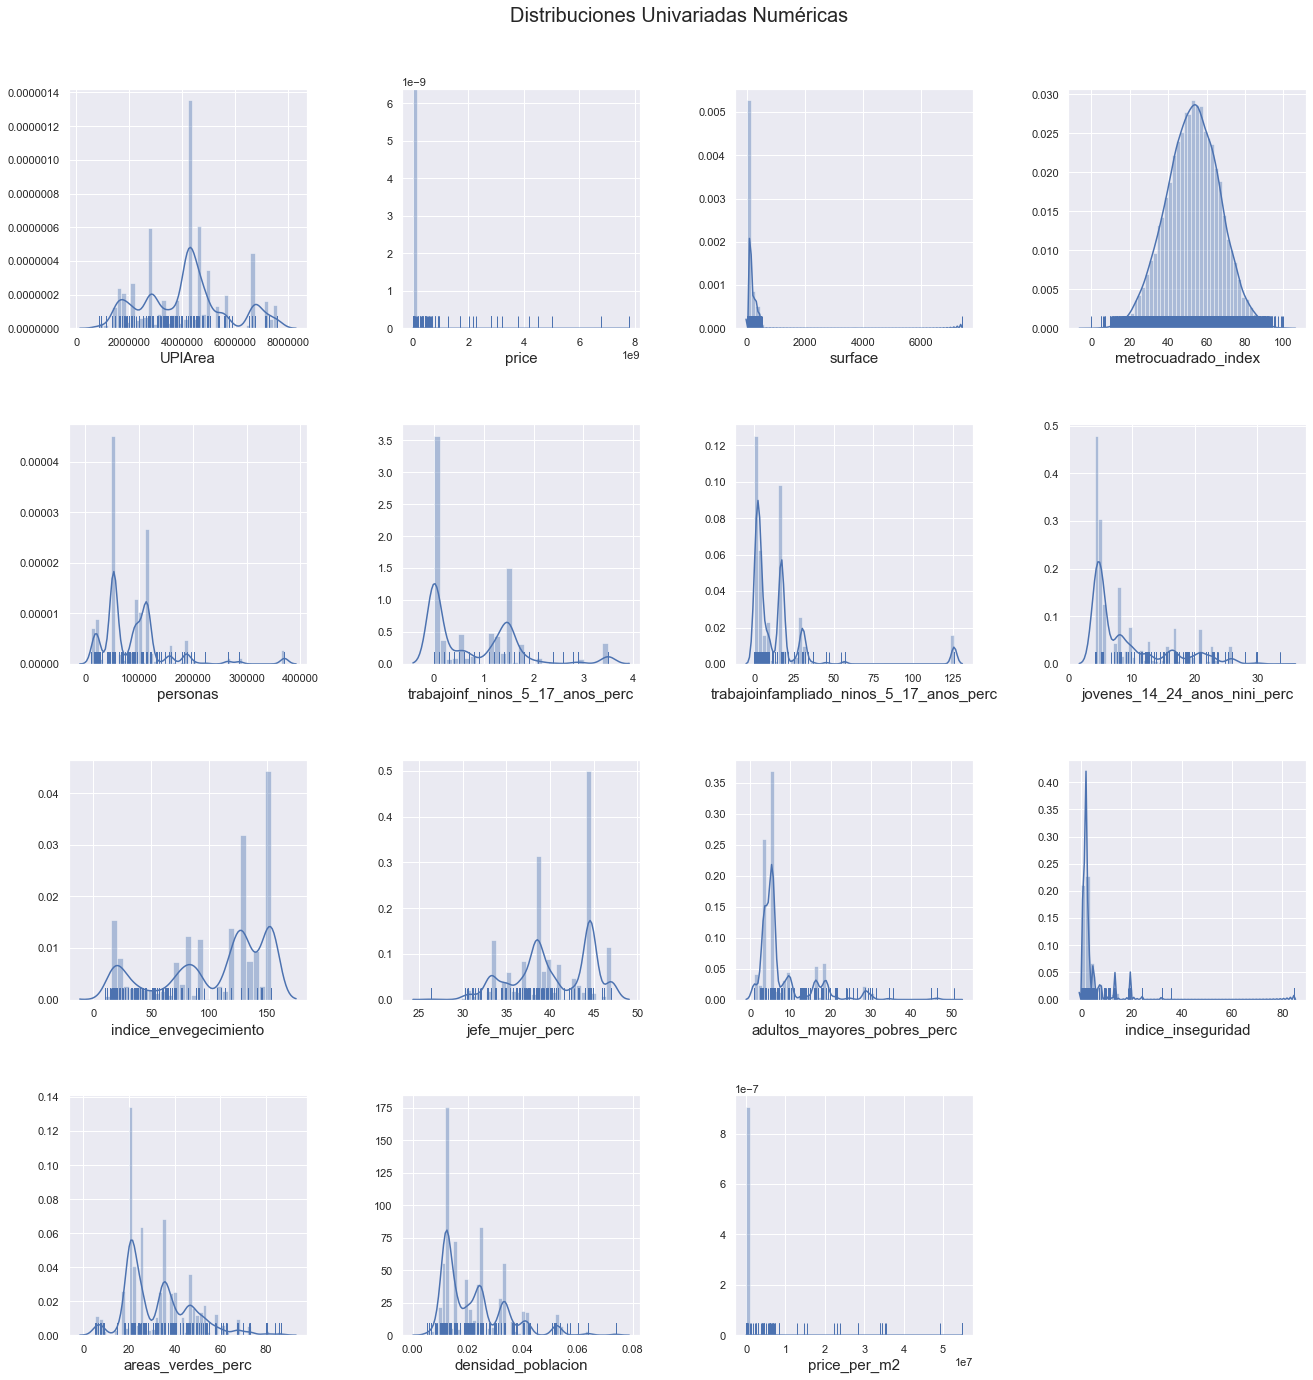

In [61]:
'''Se procede a graficar las distribuciones de las variables numéricas
'''
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4)#, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

Notamos en `price` y `price per_m2` que hay una diferencia muy brusca en la densidad de los datos, donde la tendencia es clara a precios mas moderados en comparacion. Dado que `price_per_m2` es nuestra variable respuesta, nos interesa que ésta presente una distribución que sea lo suficientemente suave para poder realizar futuras transformaciones en nuestro futuro modelo regresor. Notamos que considerando datos con valor de `price_per_m2` < 100.000, se obtiene el siguiente dataframe.

In [62]:
df[df[('numeric','price_per_m2')]<=10**5]

numeric                                                  \
            UPlArea      price surface metrocuadrado_index personas   
0               NaN  1050000.0    63.0                25.6      NaN   
1               NaN   650000.0    36.0                32.5      NaN   
2               NaN   650000.0    36.0                31.8      NaN   
3               NaN  3930000.0   100.0                57.3      NaN   
4               NaN  1900000.0    97.0                38.7      NaN   
...             ...        ...     ...                 ...      ...   
16296           NaN   900000.0   100.0                34.9      NaN   
16297           NaN   950000.0   120.0                38.3      NaN   
16298           NaN   550000.0    40.0                31.4      NaN   
16299           NaN   630000.0    45.0                48.5      NaN   
16300  2.752775e+06   700000.0    30.0                31.5  68430.0   

                                                                               \
      trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                                 NaN                                     NaN   
1                                 NaN                                     NaN   
2                                 NaN                                     NaN   
3                                 NaN                                     NaN   
4                                 NaN                                     NaN   
...                               ...                                     ...   
16296                             NaN                                     NaN   
16297                             NaN                                     NaN   
16298                             NaN                                     NaN   
16299                             NaN                                     NaN   
16300                             0.6                                     3.9   

                                                                          ...  \
      jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                              NaN                   NaN             NaN  ...   
1                              NaN                   NaN             NaN  ...   
2                              NaN                   NaN             NaN  ...   
3                              NaN                   NaN             NaN  ...   
4                              NaN                   NaN             NaN  ...   
...                            ...                   ...             ...  ...   
16296                          NaN                   NaN             NaN  ...   
16297                          NaN                   NaN             NaN  ...   
16298                          NaN                   NaN             NaN  ...   
16299                          NaN                   NaN             NaN  ...   
16300                         20.7                  35.2       44.579934  ...   

      categorical                                                     \
        furnished property_type n_garajes product_type n_bath    upz   
0             0.0          casa         1          NaN      2    NaN   
1             0.0   apartamento       NaN          NaN      1    NaN   
2             0.0   apartamento       NaN          NaN      1    NaN   
3             1.0          casa         1            1      2    NaN   
4             0.0          casa         1            1      3    NaN   
...           ...           ...       ...          ...    ...    ...   
16296         0.0          casa       NaN            1    NaN    NaN   
16297         0.0          casa       NaN            1    NaN    NaN   
16298         0.0   apartamento       NaN          NaN      1    NaN   
16299         0.0   apartamento       NaN            6      1    NaN   
16300         0.0   apartamento       NaN          NaN      1  UPZ11   

                                     miscel

Tenemos una diferencia de 100 datos con la data original, es decir, estamos ignorando los 100 valores donde `price_per_m2` > 100.000. Veamos ahora como se ve su distribución.

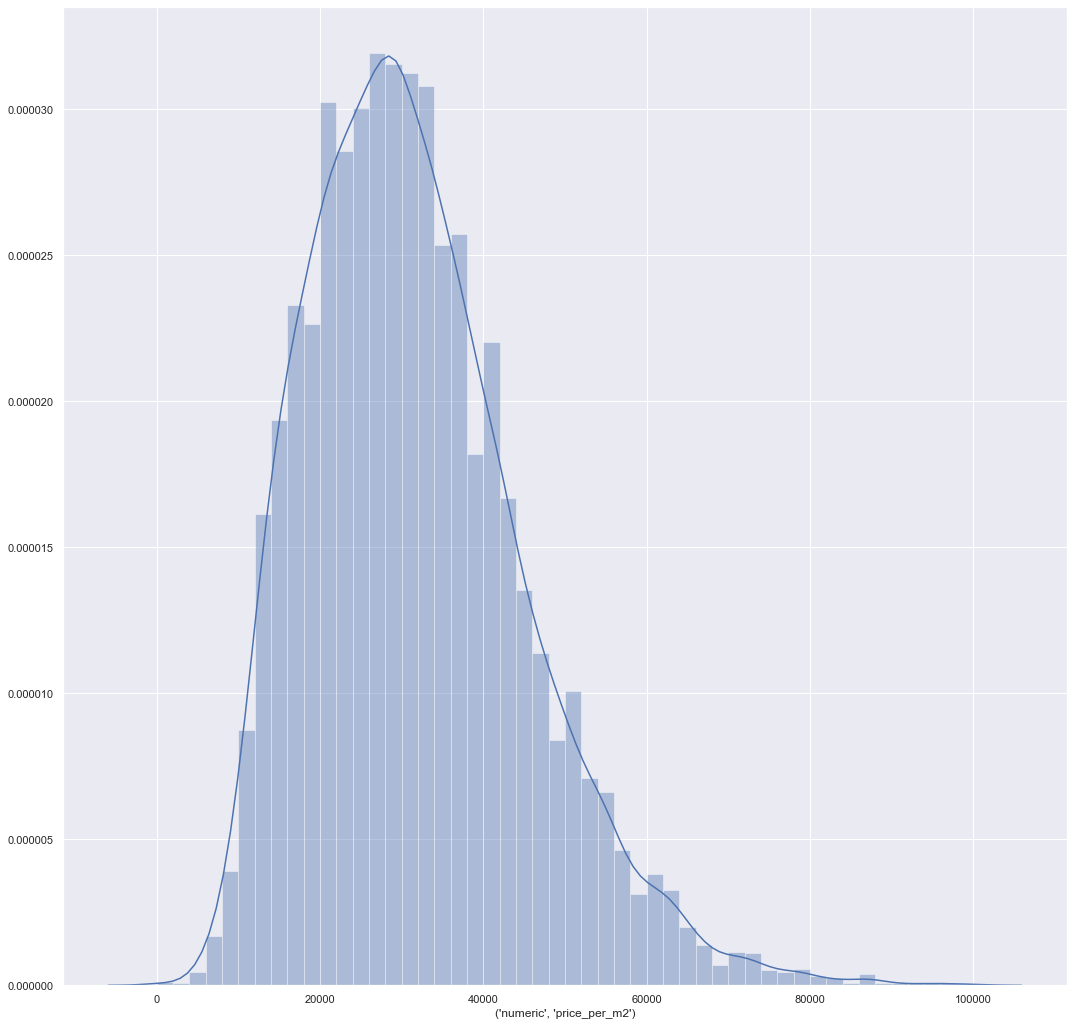

In [63]:
sns.distplot(df[df[('numeric','price_per_m2')] <= 10**5][('numeric','price_per_m2')])

Notamos una clara mejora con respecto al escenario con toda la data. Actualizamos df y vemos ahora como distribuyen todas las variables numericas asociadas.

In [64]:
df = df[df[('numeric','price_per_m2')] <= 10**5]
df

numeric                                                  \
            UPlArea      price surface metrocuadrado_index personas   
0               NaN  1050000.0    63.0                25.6      NaN   
1               NaN   650000.0    36.0                32.5      NaN   
2               NaN   650000.0    36.0                31.8      NaN   
3               NaN  3930000.0   100.0                57.3      NaN   
4               NaN  1900000.0    97.0                38.7      NaN   
...             ...        ...     ...                 ...      ...   
16296           NaN   900000.0   100.0                34.9      NaN   
16297           NaN   950000.0   120.0                38.3      NaN   
16298           NaN   550000.0    40.0                31.4      NaN   
16299           NaN   630000.0    45.0                48.5      NaN   
16300  2.752775e+06   700000.0    30.0                31.5  68430.0   

                                                                               \
      trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                                 NaN                                     NaN   
1                                 NaN                                     NaN   
2                                 NaN                                     NaN   
3                                 NaN                                     NaN   
4                                 NaN                                     NaN   
...                               ...                                     ...   
16296                             NaN                                     NaN   
16297                             NaN                                     NaN   
16298                             NaN                                     NaN   
16299                             NaN                                     NaN   
16300                             0.6                                     3.9   

                                                                          ...  \
      jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                              NaN                   NaN             NaN  ...   
1                              NaN                   NaN             NaN  ...   
2                              NaN                   NaN             NaN  ...   
3                              NaN                   NaN             NaN  ...   
4                              NaN                   NaN             NaN  ...   
...                            ...                   ...             ...  ...   
16296                          NaN                   NaN             NaN  ...   
16297                          NaN                   NaN             NaN  ...   
16298                          NaN                   NaN             NaN  ...   
16299                          NaN                   NaN             NaN  ...   
16300                         20.7                  35.2       44.579934  ...   

      categorical                                                     \
        furnished property_type n_garajes product_type n_bath    upz   
0             0.0          casa         1          NaN      2    NaN   
1             0.0   apartamento       NaN          NaN      1    NaN   
2             0.0   apartamento       NaN          NaN      1    NaN   
3             1.0          casa         1            1      2    NaN   
4             0.0          casa         1            1      3    NaN   
...           ...           ...       ...          ...    ...    ...   
16296         0.0          casa       NaN            1    NaN    NaN   
16297         0.0          casa       NaN            1    NaN    NaN   
16298         0.0   apartamento       NaN          NaN      1    NaN   
16299         0.0   apartamento       NaN            6      1    NaN   
16300         0.0   apartamento       NaN          NaN      1  UPZ11   

                                     miscel

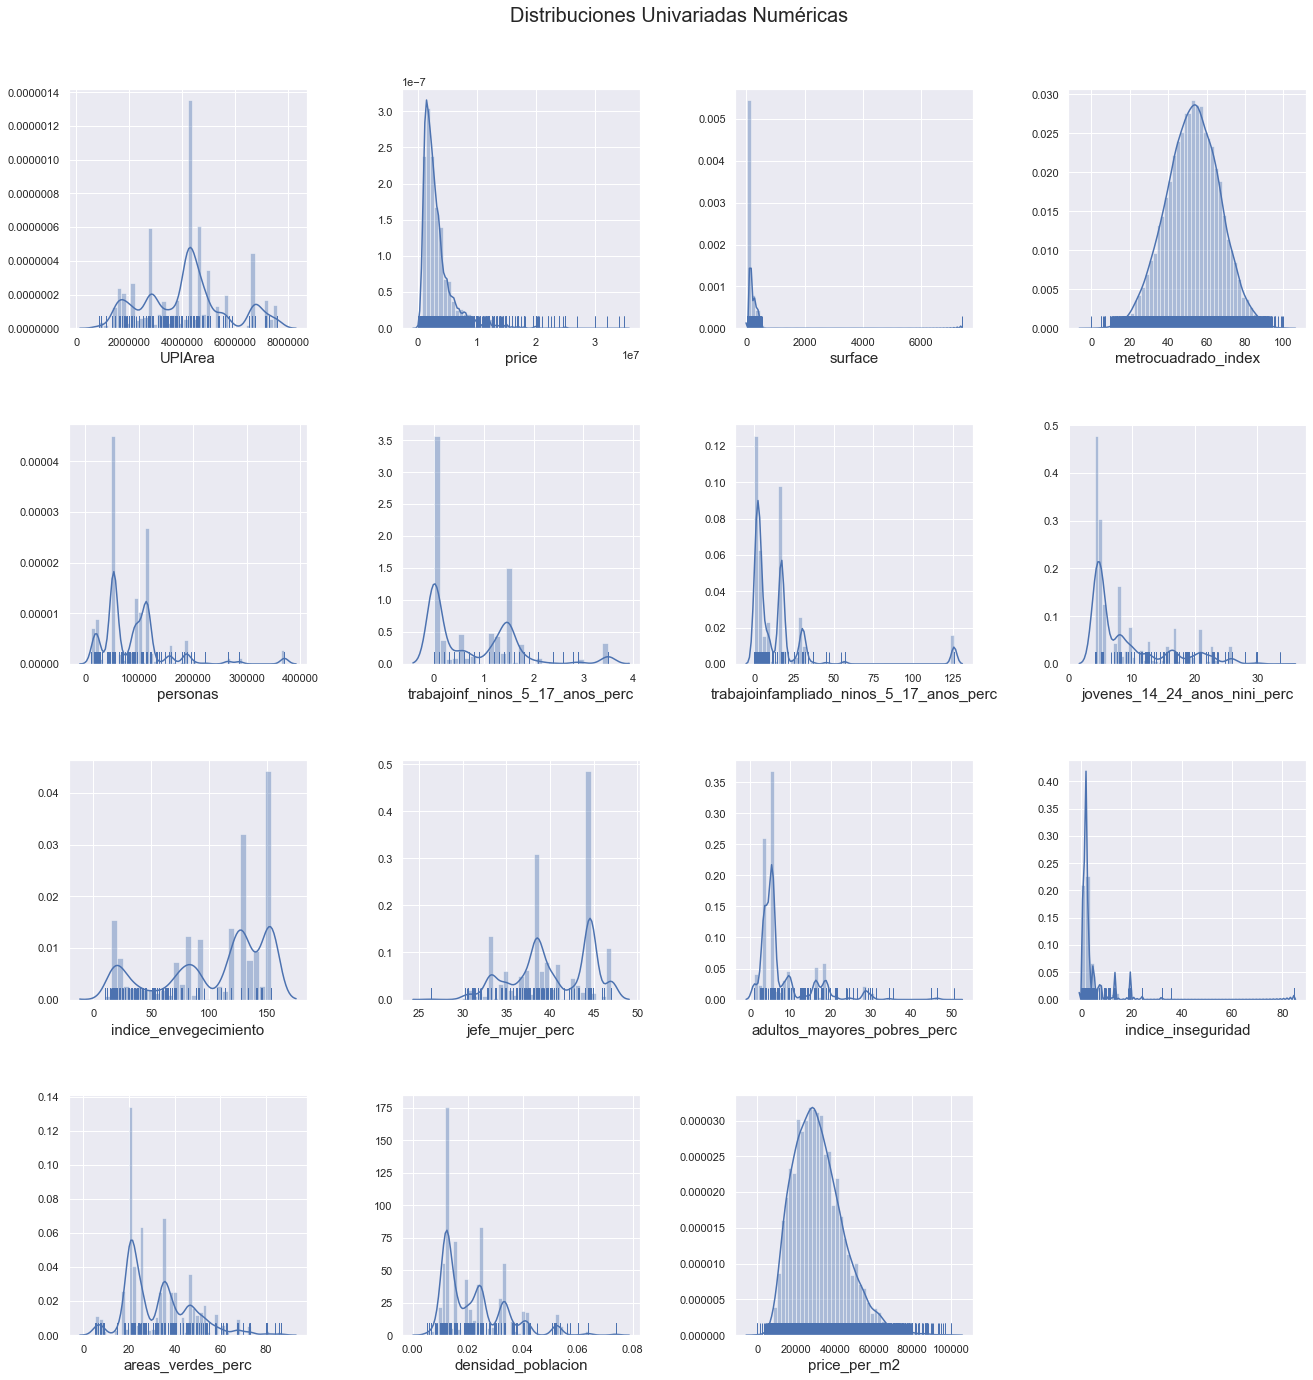

In [65]:
'''Se procede a graficar las distribuciones de las variables numéricas
luego del ajuste
'''
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4)#, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

Notamos cómo la distribución de la data es más clara al trabajar sin los casos donde `price_per_m2` es demasiado grande. Notamos en `surface` que existe un dato que se aleja mucho de donde se concentra la data, y su valor es al menos superior a 1000, donde los demas valores se concentran por debajo de 1000. Buscamos tal valor:

In [66]:
df[('numeric','surface')].nlargest(2)

9491    7400.0
5318     540.0
Name: (numeric, surface), dtype: float64

Veamos qué ocurre al quitar tal valor de la data, notamos una clara mejora en la visualización.

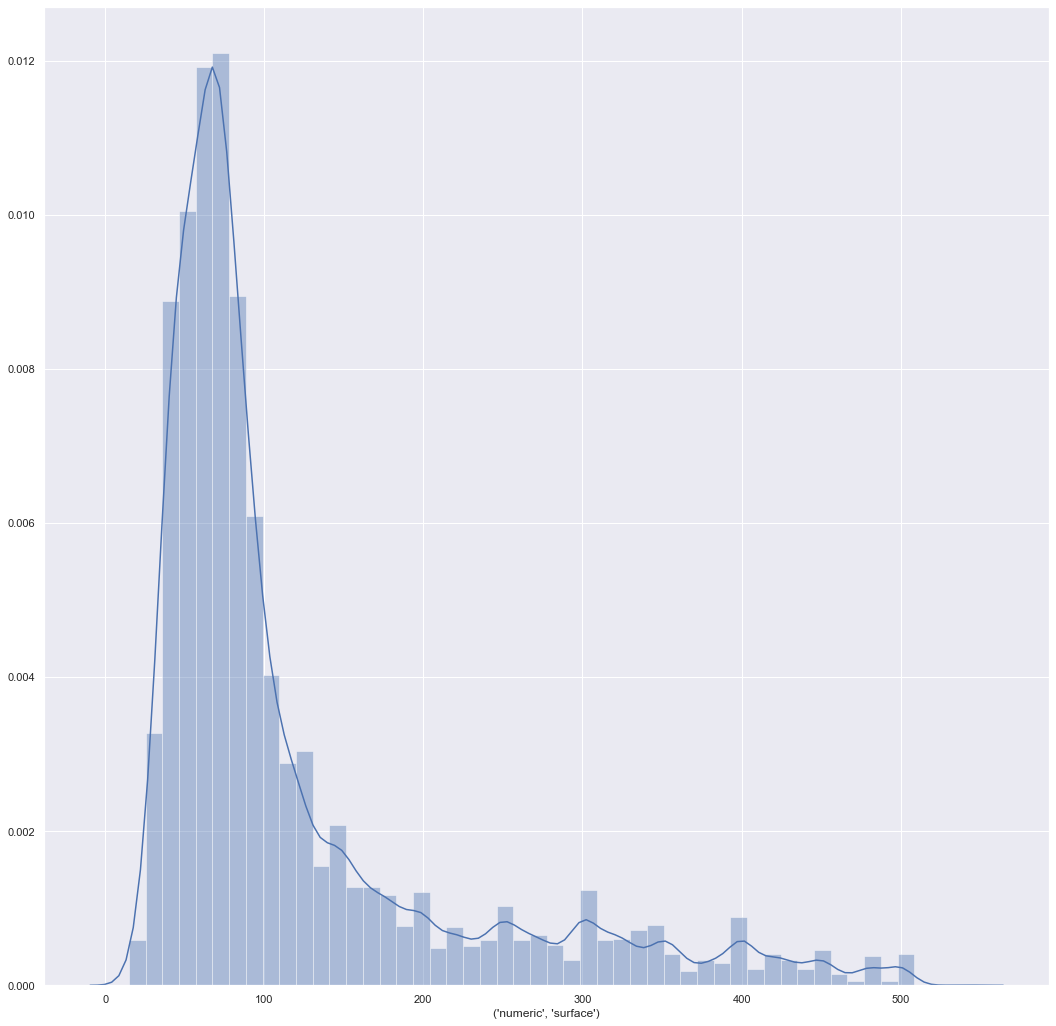

In [67]:
sns.distplot(df[df[('numeric','surface')]< 10**3][('numeric','surface')])

In [68]:
# Se actualiza df
df = df[df[('numeric','surface')]< 10**3]
df.reset_index(inplace=True, drop=True)

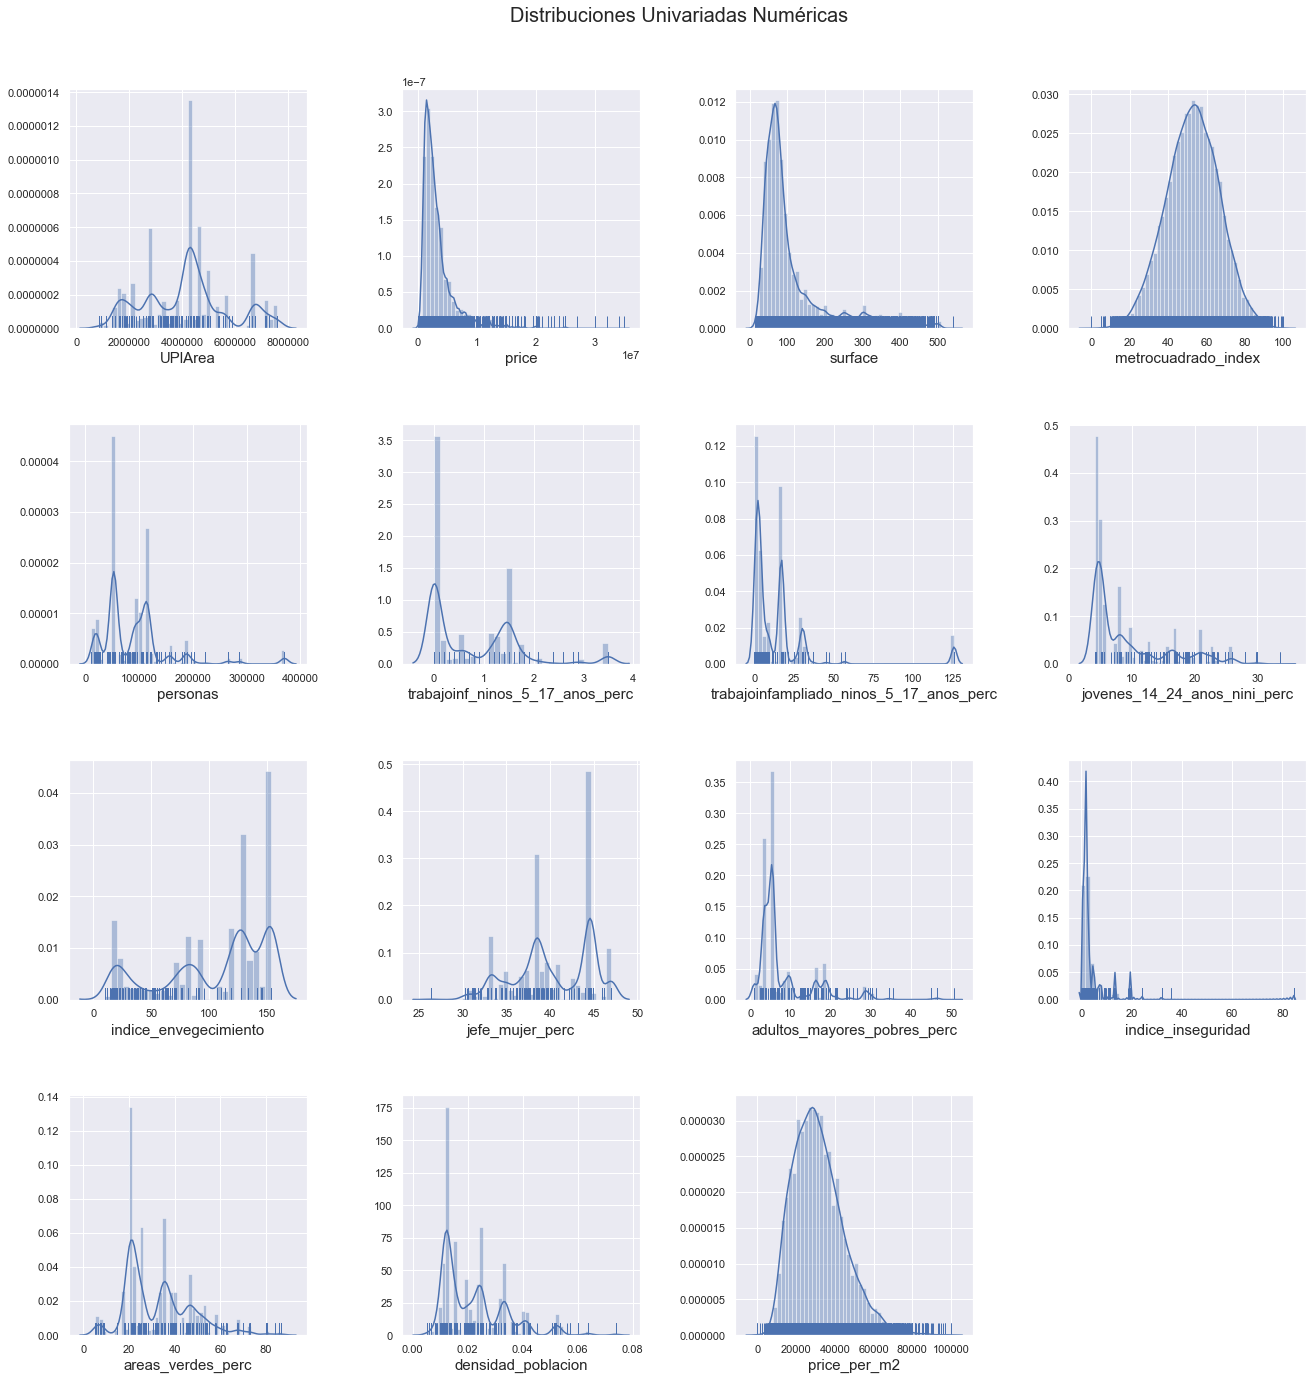

In [69]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=4, ncols=4)#, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)].dropna(), ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

Queremos ver como se comporta la variable `price_per_m2` en respuesta a algunas variables numéricas.

In [70]:
def scatter_dists(col, df=df, h=.3, w=.1, fontdict={'fontsize': 20}, reg=True):
    ''' Recibe una columna numerica y genera una visualizacion comparativa.
    
    Genera una figura por sobre el dataframe (por defecto), recibe 
    parametros extra como el espaciado entre subfigura.
    
    Args:
    ----------
    
    col: String
         El nombre de la columna numerica a visualizar
    
    h,w: float
        Espaciado entre subplot h -> vertical, w -> horizontal
    
    fontdict: dict
             Permite configurar las fuentes de los subplots
    reg: bool
         Permite graficar una regresion lineal sobre los datos (if True)
        
    Returns: None
        Se muestra una figura en pantalla    
    
    '''

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2, 1, figsize=[12, 13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    if reg:
        sns.regplot(x=df[('numeric', col)],
                    y=df[('numeric', 'price_per_m2')],
                    ax=ax[0])
        ax[0].set_title('Regplot plot {} vs price_per_m2'.format(col), fontdict)
    else:
        sns.scatterplot(('numeric', col),
                        y=('numeric', 'price_per_m2'),
                        data=df,
                        ax=ax[0])
        ax[0].set_title('Scatter plot {} vs price_per_m2'.format(col), fontdict)

    
    # Distribucion univariada
    sns.distplot(df[('numeric', col)].dropna(), ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('price_per_m2', fontdict)
    ax[1].set_title('Frecuencias {}'.format(col), fontdict)

    plt.subplots_adjust(wspace=w, hspace=h)


Notamos que la variable `metrocuadrado_index`, presenta una buena distribución en la data y presenta un comportamiento lineal con ruido, puede que esta variable sea de interés a la hora de regresionar `price_per_m2`.

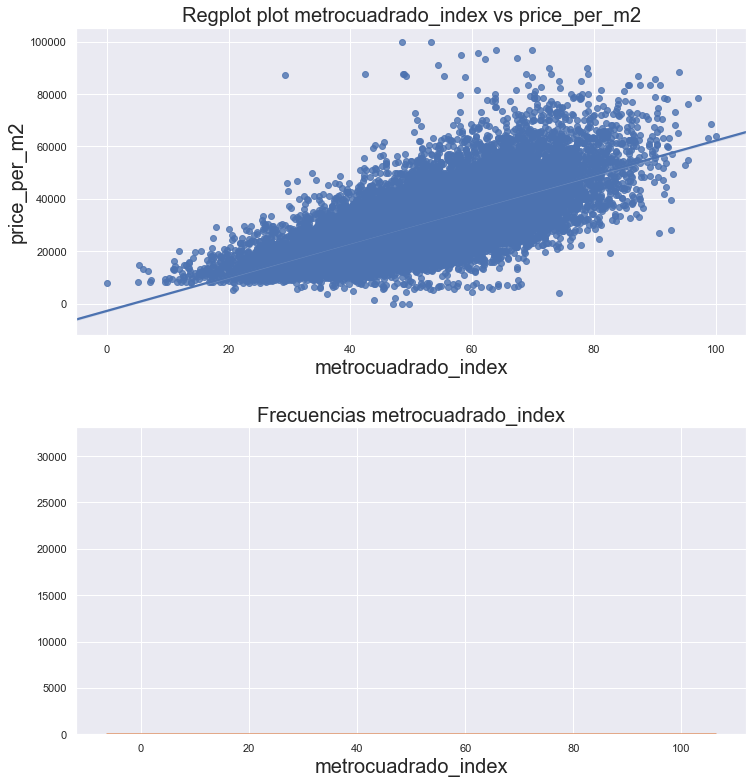

In [71]:
scatter_dists('metrocuadrado_index')

Notamos que las variables `price` y `surface` presentan un comportamiento lineal con respecto a `price_per_m2`, pero esto se debe a como se generó la columna `price_per_m2`, luego la relación existente entre éstas variables fue impuesta y no presenta un caso de interés.

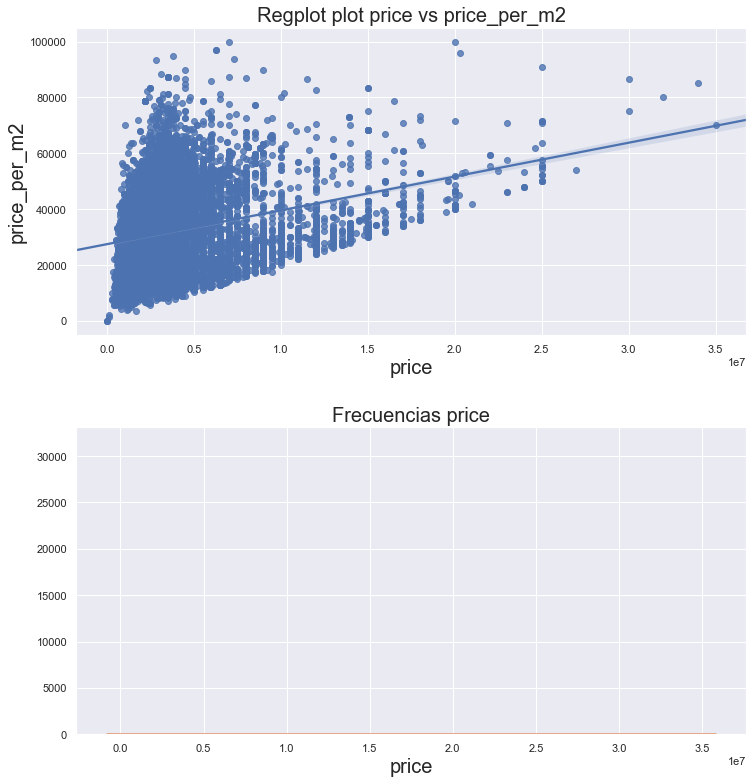

In [72]:
scatter_dists('price')

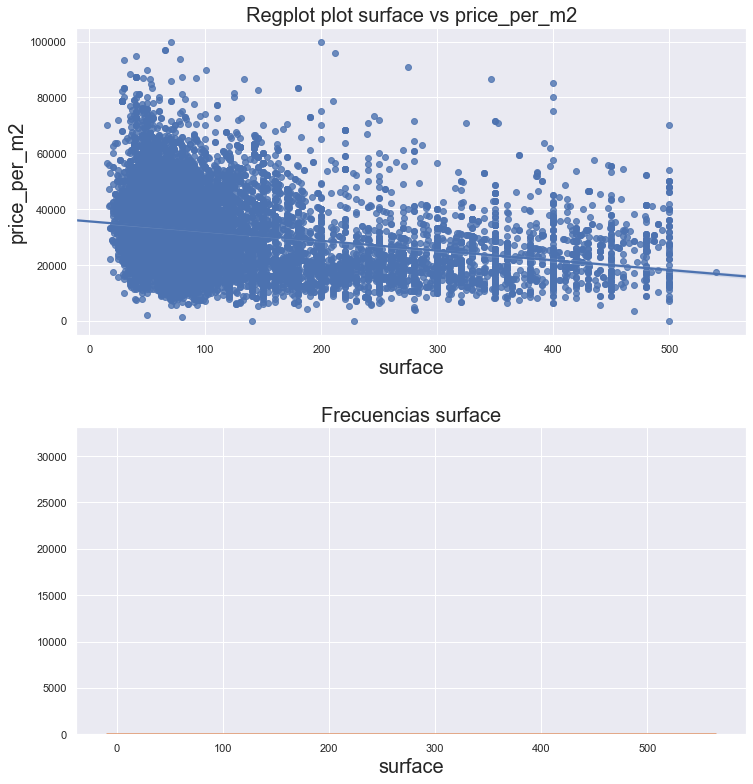

In [73]:
scatter_dists('surface')

Ruido, `price_per_m2` no presenta ninguna respuesta clara ante esta variable. Su significancia deberá ser evaluada más adelante.
Resultado análogo entre:

`UPlArea`

`trabajoinf_ninos_5_17_anos_perc`

`trabajoinfampliado_ninos_5_17_anos_perc`

`jovenes_14_24_anos_nini_perc`

`indice_envegecimiento`

`jefe_mujer_perc`

`adultos_mayores_pobres_perc`

`indice_inseguridad`

`areas_verdes_perc`

`densidad_poblacion`

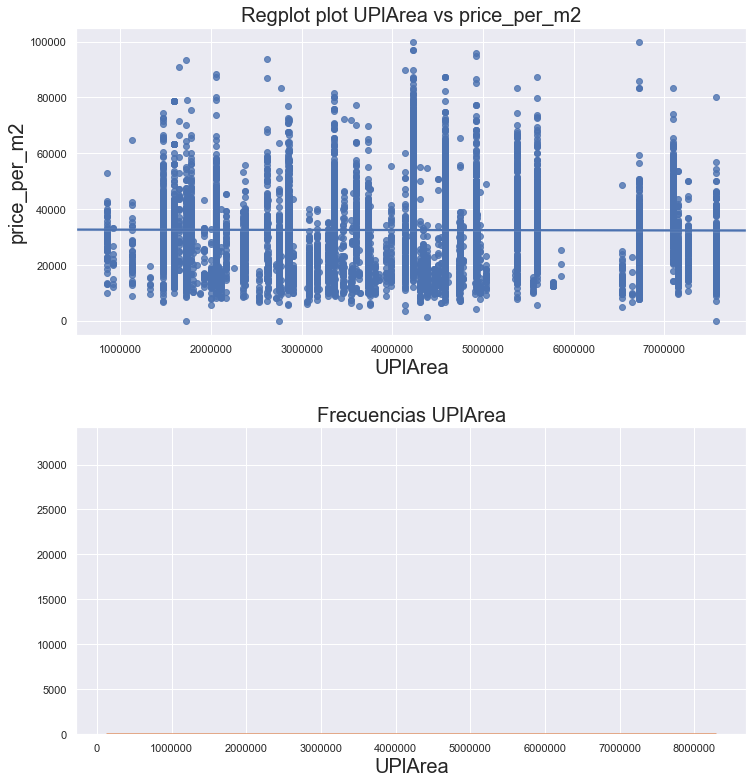

In [74]:
scatter_dists('UPlArea')

Procedemos a analizar las variables categóricas

In [75]:
print(len(categorical))
print(categorical)

8
['rent_type', 'n_rooms', 'furnished', 'property_type', 'n_garajes', 'product_type', 'n_bath', 'upz']


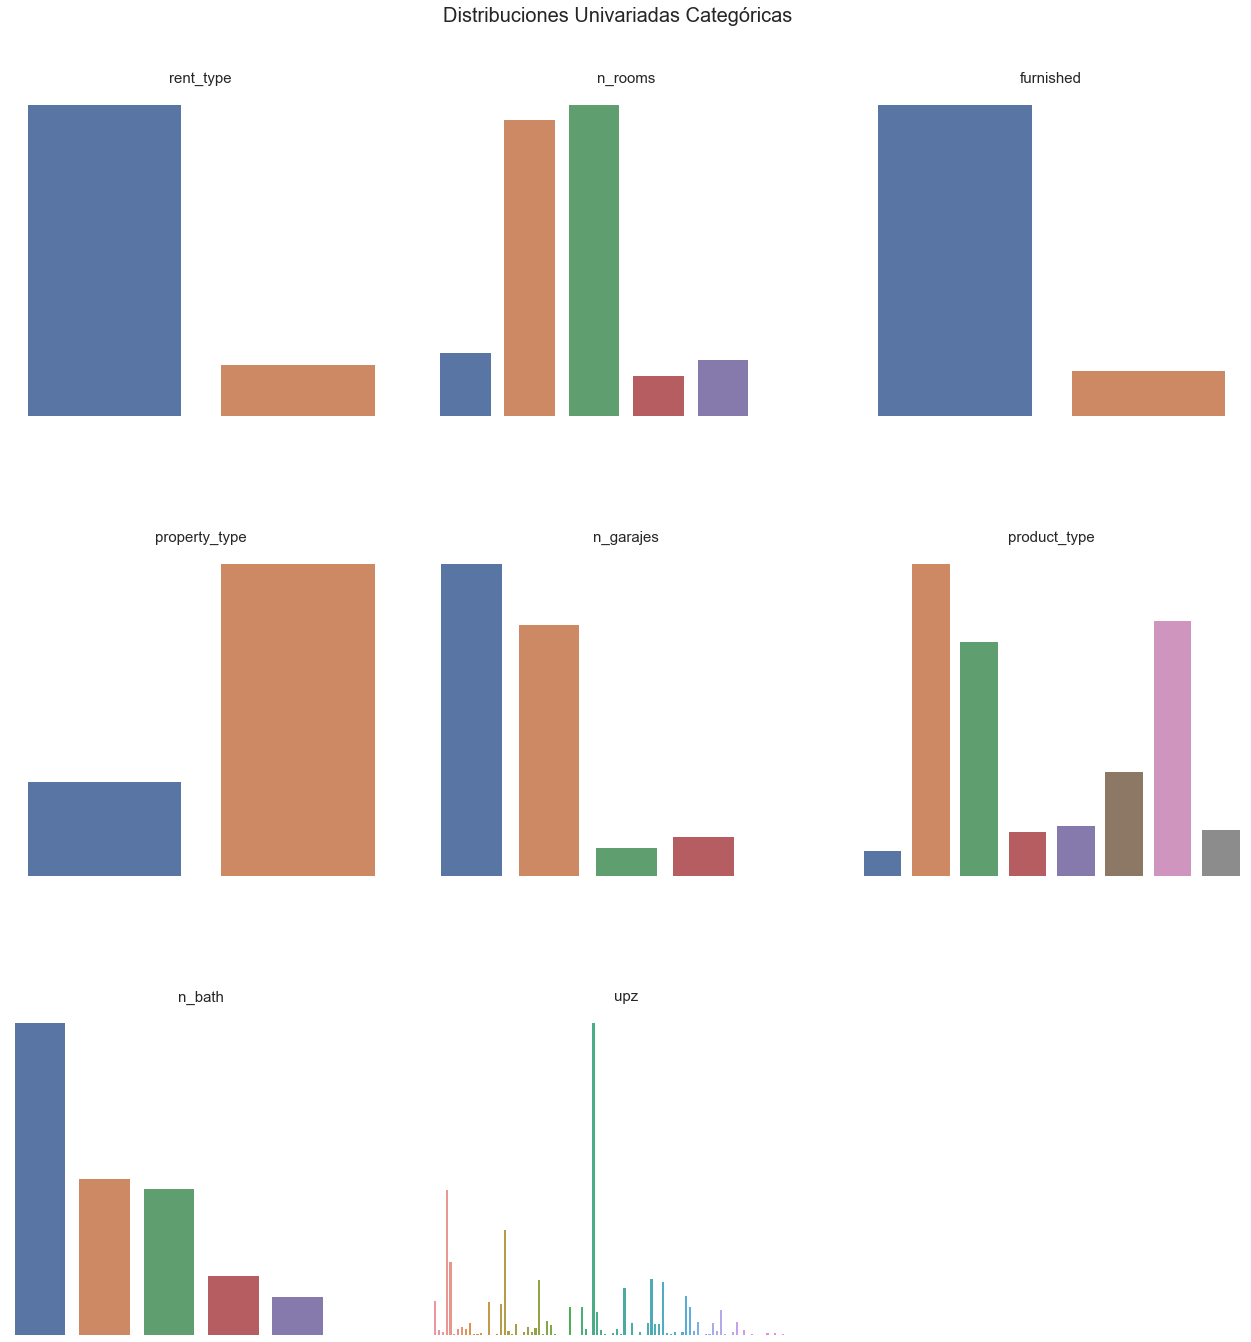

In [76]:
'''Se procede a graficar los histogramas de las variables categóricas
'''
# Grilla de subplots
fig, ax = plt.subplots(nrows=3, ncols=3)

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()
# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Categóricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), categorical):
    # Graficos para datos tipos str
    sns.countplot(df[('categorical',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
  
    
# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [77]:
'''Estudiemos la variabilidad de las variables categóricas ''
'''
# Función para generar gráficos
def categoricalplot(df,col,log=False):
    # Sirve para fija el tamaño de las etiquetas del plot
    fontdict = {'fontsize':20}

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2,1,figsize=[12,13])
    
    # violin plot --> equivalente a catplot(kind = 'violin')

    if log:
        sns.violinplot(('categorical', col),
                    y=('numeric', 'price_per_m2'),
                    data=df,
                    kind='violin',
                    ax=ax[0]).set_yscale('log')
    
    else:
        sns.violinplot(('categorical', col),
                    y=('numeric', 'price_per_m2'),
                    data=df,
                    kind='violin',
                    ax=ax[0])
    
    sns.countplot(df[('categorical',col)], ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('price_per_m2', fontdict)
    ax[0].set_title('Violin plot {} vs price_per_m2'.format(col), fontdict)
    ax[1].set_title('Frecuencias {}'.format(col), fontdict)

    h, w = (.3, .1)
    plt.subplots_adjust(wspace=w, hspace=h)

`upz`

Observamos que la variable categorica `upz` presenta un histograma a la vista confuso(demasiadas categorias), por lo que más adelante buscaremos una mejor manera de agrupar éstas categorías.

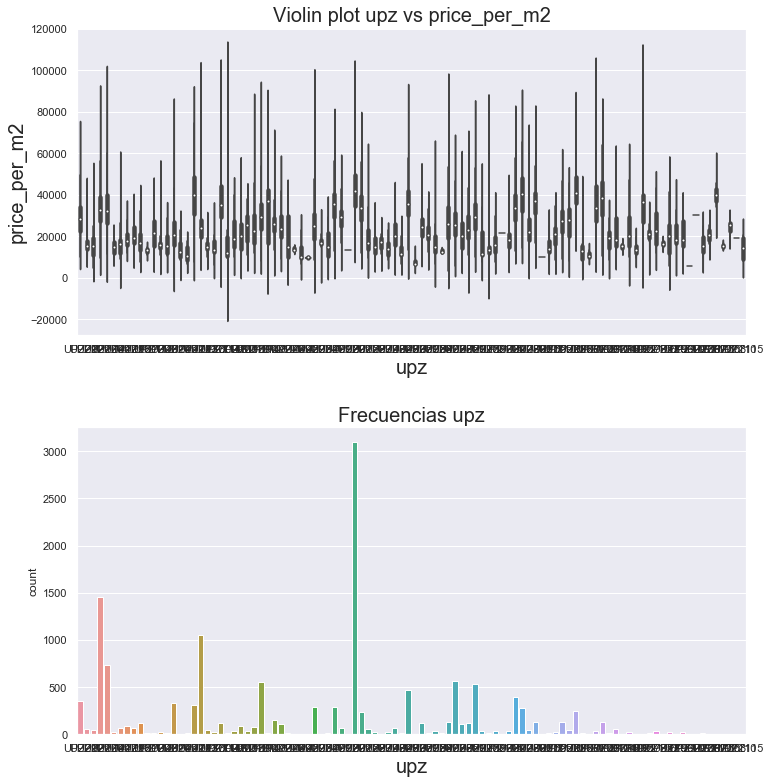

In [78]:
categoricalplot(df,'upz')

`product_type`

Notamos que para los `product_type` 1-5 (casas), presentan una concentración en valores levemente más bajos que los 6-8 (apartamentos), además la variabilidad del valor de precio dado si es casa o apartamento presentan una distribución similar. Por ende `product_type` podría corresponder a una variable de interés a la hora de definir `price_per_m2`.

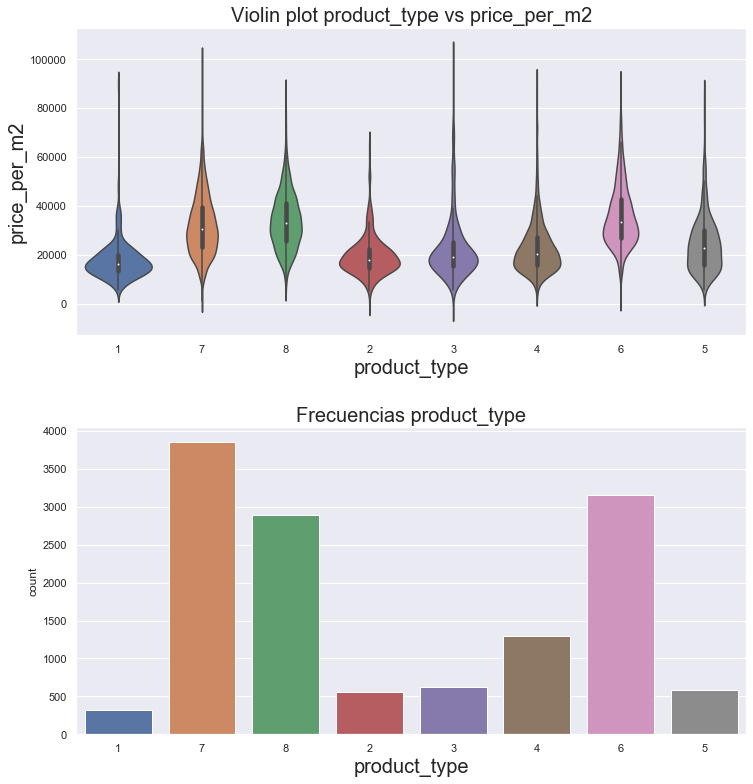

In [79]:
categoricalplot(df,'product_type')

`property_type`

Notamos que los valores de `price_per_m2` para la categoría 'casa' se concentran en su mayoría en un valor menor que la categoría apartamento. Ésto se condice con el gráfico anterior y se debe en parte a cómo definimos la variable `product_type`, luego puede existir cierta correlación entre estas dos variables, lo cual puede corroborarse mediante un test estadístico.

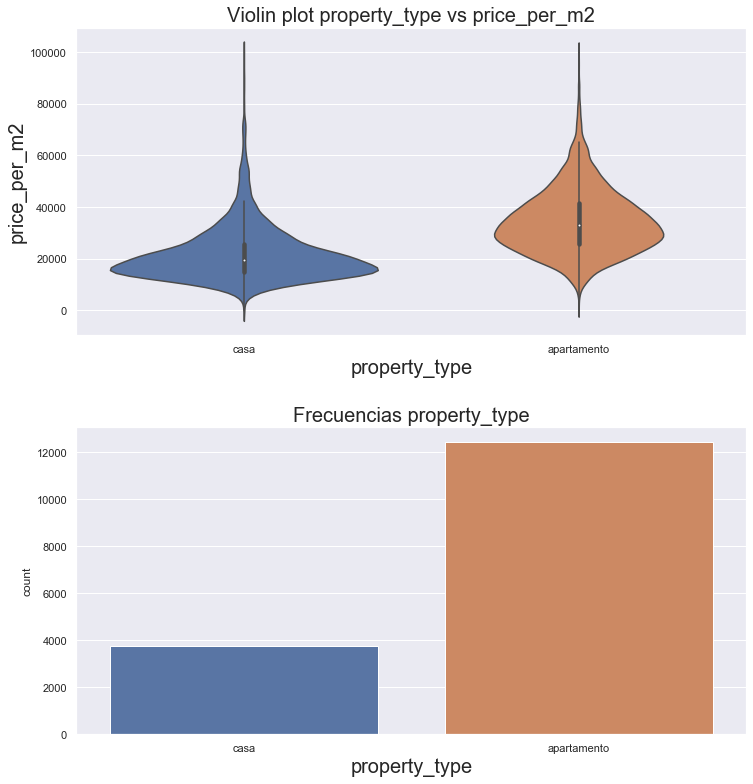

In [80]:
categoricalplot(df,'property_type')

`rent_type`

Notamos que no difieren en mediana y sus distribuciones en `price_per_m2` se comportan de manera similar, por ende no existe una manera de poder identificar una de las categorías en base al valor de `price_per_m2`. Por lo tanto, `rent_type` corresponde a una variable candidata a no ser considerada en el modelo final.

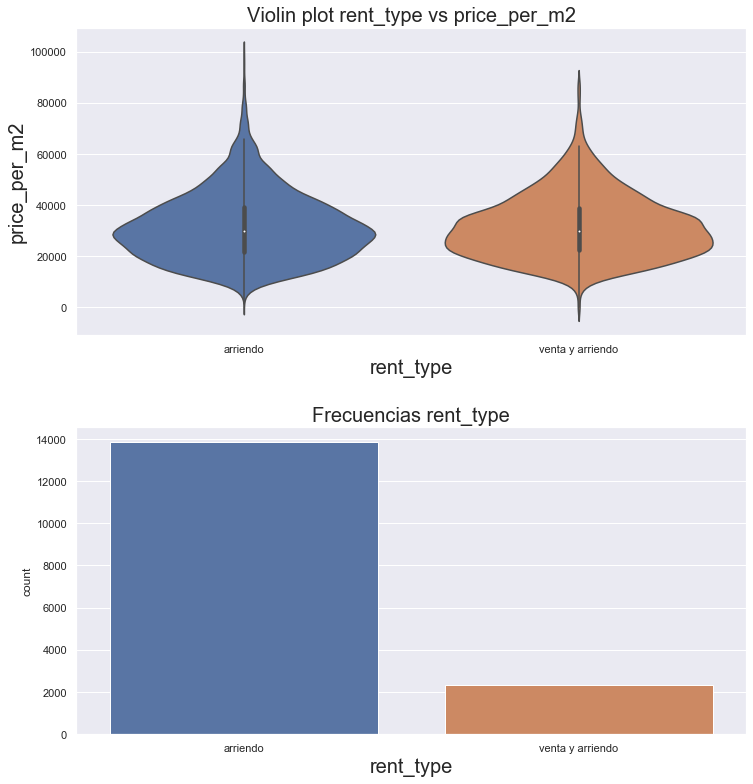

In [81]:
categoricalplot(df,'rent_type')

`furnished`

Si bien no se nota una diferencia en los valores donde más se cocentra cada categoría, el hecho de la clara diferencia en la distribución de la variable nos hace dudar sobre la efectividad en describir la variable `price_per_m2`, en caso de ser incluída en el modelo. Por lo tanto, más adelante se verá si incluir o no esta variable en el modelo final.

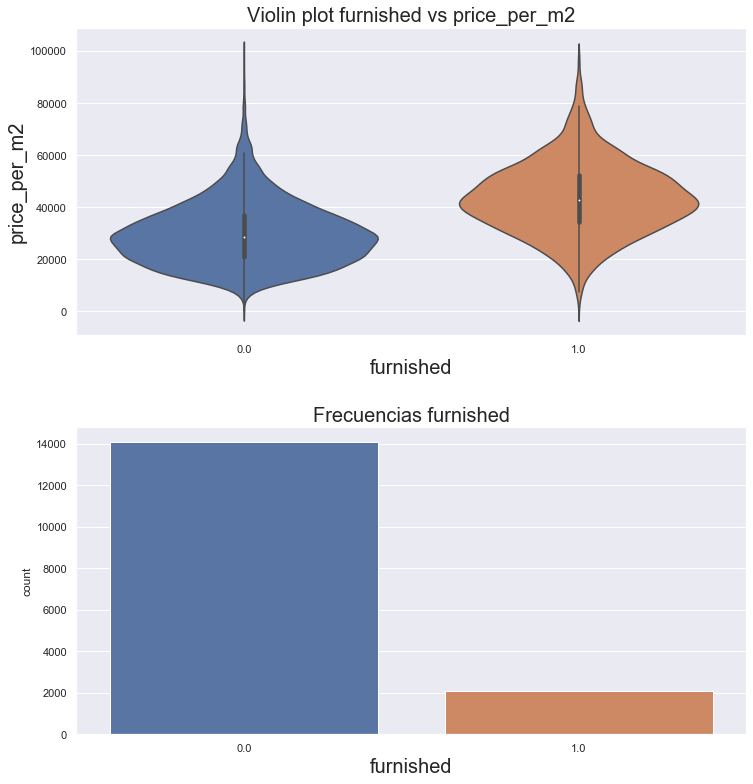

In [82]:
categoricalplot(df,'furnished')

`n_rooms`

Se notan claras diferencias en las medias del valor `price_per_m2` entre categorias, ademas de una distribución normalmente aproximable en los valores en esta variable. Por lo tanto corresponde a un candidato sólido a ser incluido en el modelo final.

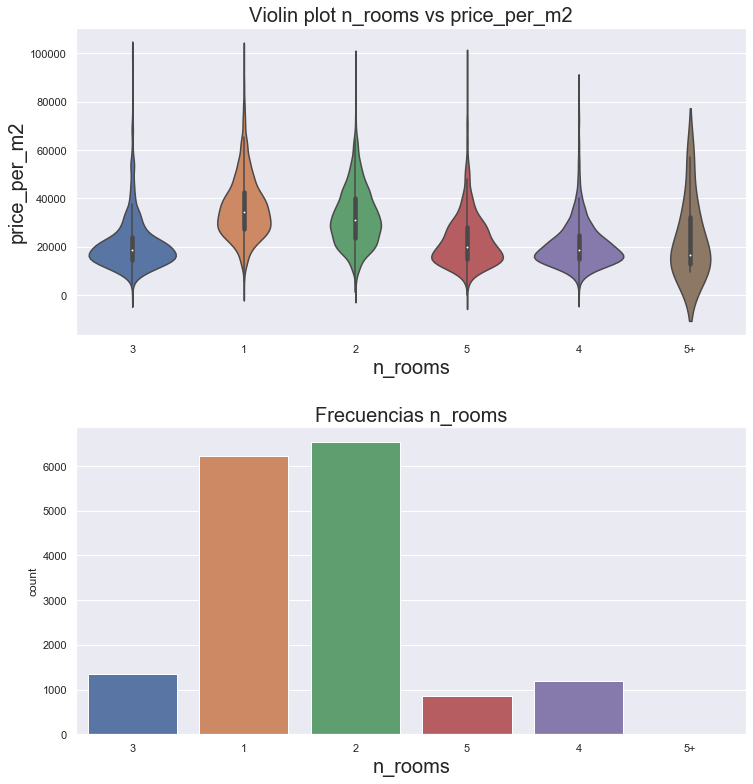

In [83]:
categoricalplot(df,'n_rooms')

`n_bath`

Si bien la diferencia de medias en este caso tambien existe pero en menor medida, la forma variabilidad en su distribución puede ser información valiosa para la descripción de `price_per_m2`, por lo tanto a priori es una variable interesante a considerar.

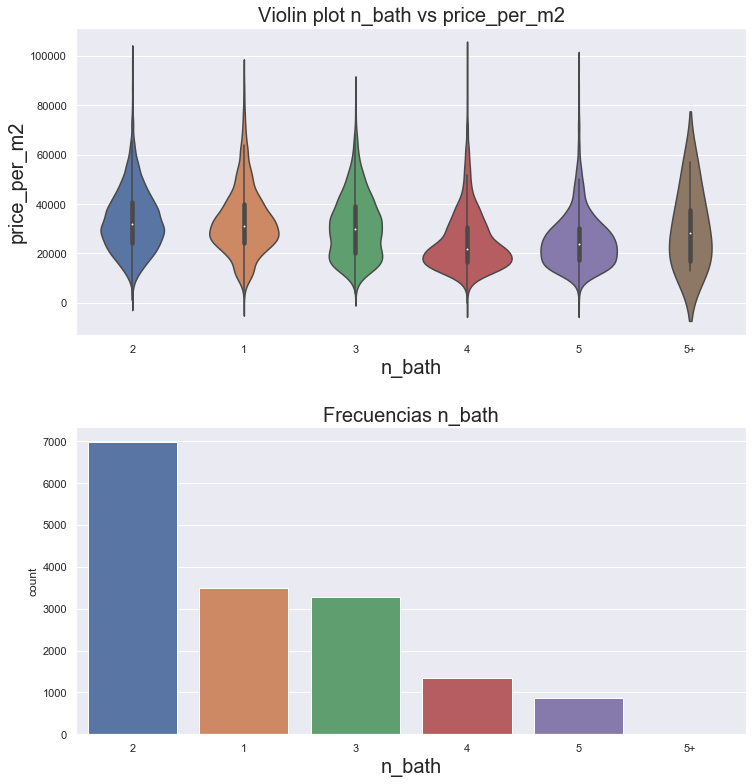

In [84]:
categoricalplot(df,'n_bath')

`n_garajes`

Tenemos un caso similar a `n_rooms`, donde aquí la diferencia de medias es menos clara, y debido a que los violines son más achatados nos hace dudar sobre la correcta descripción de `price_per_m2` por medio de esta variable. Veremos mediante un test one-way-ANOVA si existe una diferencia significativa entre grupos.

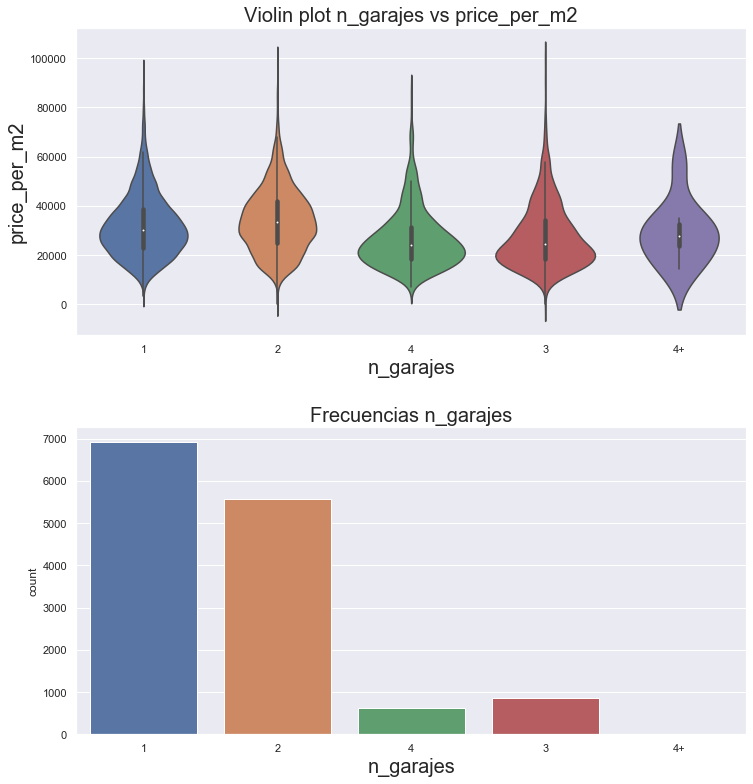

In [85]:
categoricalplot(df,'n_garajes')

In [86]:
'''Se genera una función auxiliar para indexar las columnas en base
a su tipo, extraído de la clase 9 del curso.
'''
def indexer(cols, t_c = df.columns):
    '''Genera columnas multinivel a partir de nombres de columna planos.'''
    
    set_to_tuple = set(*[cols])

    tuples = [
        i for i in t_c if set_to_tuple.intersection(set(i))
    ]
    
    return tuples

In [87]:
idx = indexer(['price_per_m2','n_garajes'])
grouped = df[idx].groupby(idx[1])
total_groups = grouped.groups.keys()
groups = [grouped.get_group(i) for i in total_groups]
groups[0]

,numeric,categorical
,price_per_m2,n_garajes
0,16666.666667,1
3,39300.000000,1
4,19587.628866,1
5,28787.878788,1
6,23913.043478,1
...,...,...
16181,10000.000000,1
16183,12500.000000,1
16184,9375.000000,1


In [88]:
'''Se utiliza una función auxiliar para limpiar el formato de cada grupo,
extraído de la clase 9 del curso.
'''
def group_cleaner(group, col, d_f=df):
    ''' Limpia un grupo.
    Reconoce la categoria del grupo, en la posicion [:,1], 
    guarda ese nombre y elimina la columna de categoria, 
    posteriormente renombra la columna.
    
    Args:
    ----------
    
    group: pandas Groupby object
          Recibe una agrupacion para categorias
          
    Returns:
    ----------
        pandas Groupby object
        Entrega el grupo ordenado.
    '''
    group_0 = group.copy()
    name = group_0.iloc[0,1]
    group_0.drop(indexer([col], t_c = d_f.columns), axis=1, inplace=True)
    group_0.columns  = ('cat_{}'.format(name),)
    
    return group_0

In [89]:
'''Se procede a limpiar el formato de cada grupo y se realiza el test
'''
groups_to_test = [group_cleaner(g, 'n_garajes') for g in groups]

from scipy.stats import f_oneway

F,p = f_oneway(*groups_to_test)

print('Estadistico F:',F)
print('p valor :', p)

Estadistico F: [90.81990125]
p valor : [2.3514614e-76]


Con esto, rechazamos la nula: 'No hay diferencia significativa entre grupos'. Por lo tanto, `n_garajes` corresponde a una variable de interés a analizar.

In [90]:
alpha = 0.05
p <= alpha

array([ True])

## Parte 3

Para ver las variables faltantes, recuperamos df_copy previo a las modificaciones hechas en P2.2

In [91]:
df_copy.isnull().sum()

numeric       UPlArea                                    1946
              price                                         0
              surface                                      16
              metrocuadrado_index                           0
              personas                                   1946
              trabajoinf_ninos_5_17_anos_perc            1946
              trabajoinfampliado_ninos_5_17_anos_perc    1946
              jovenes_14_24_anos_nini_perc               1946
              indice_envegecimiento                      1946
              jefe_mujer_perc                            1946
              adultos_mayores_pobres_perc                1946
              indice_inseguridad                         1946
              areas_verdes_perc                          1946
              densidad_poblacion                         1946
              price_per_m2                                 16
categorical   rent_type                                     0
        

Vemos un esquema general de los valores faltantes en de la data, se puede observar un comportamiento similar en la ausencia de los datos asociados a las estadísticas incluidas mediante un cruce con los códigos upz. Ésto claramente es debido a que al existir barrios donde no fue posible obtener identificación mediante el código upz, no fue posible cruzar las estadísticas en la sección P1.6, por lo tanto la ausencia de las estadísticas se refleja en la ausencia de upz. El tratamiento para estos datos faltantes será eliminarlos, pues debido a no poder recuperar el upz, no podremos recuperar de manera consistente las estadísticas.

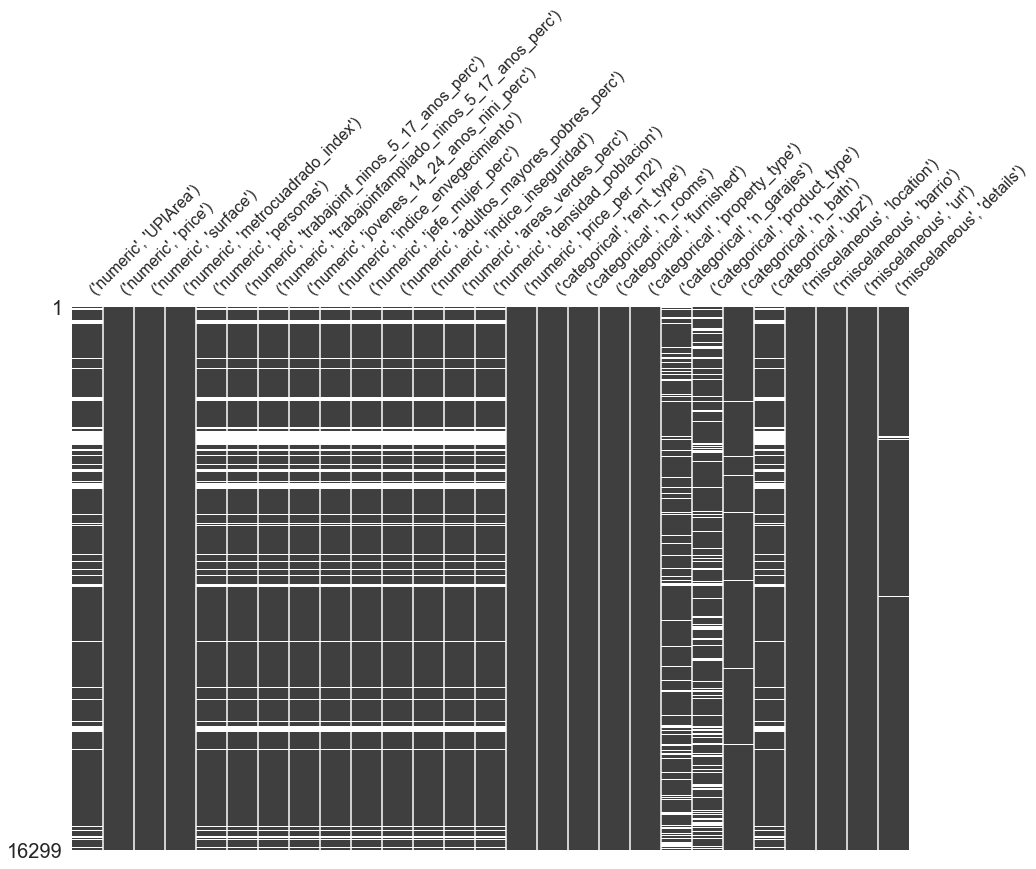

In [92]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df_copy,ax = ax, sparkline=False)

Vemos un esquema ordenado según cantidad de datos faltantes. Observamos que las columnas con más datos faltantes correspondes a `product_type` y `n_garajes`

`product_type` se debe a como la definimos en la sección P1.4, luego depende de parámetros visibles en la data (`property_type`,`surface`). Nuestro tratamiento para esta variable será simplemente eliminarlas.

`n_garajes` se debe a la ausencia de la keyword '-garajes' en `url`. Por lo tanto, la ausencia de ésta data se puede inferir a partir de la variable `url`, variable sobre la cual fue construida esta columna.

Respecto a las columnas `n_bath`,`details`,`n_rooms`,`price`,`surface` no es posible determinar un patron claro, más aun cuando la ausencia de las variables en las ultimas 3 mencionadas son pocas (menos de 33). Creemos entonces que ésta información es perdida completamente al azar, pues depende de algo que no estamos viendo reflejado en la data(mal ingreso de los datos, omisión de informacion por parte del vendedor,etc.). Ésta información se intentará imputar asignando media mediante agrupaciónes por `upz` donde sea posible.

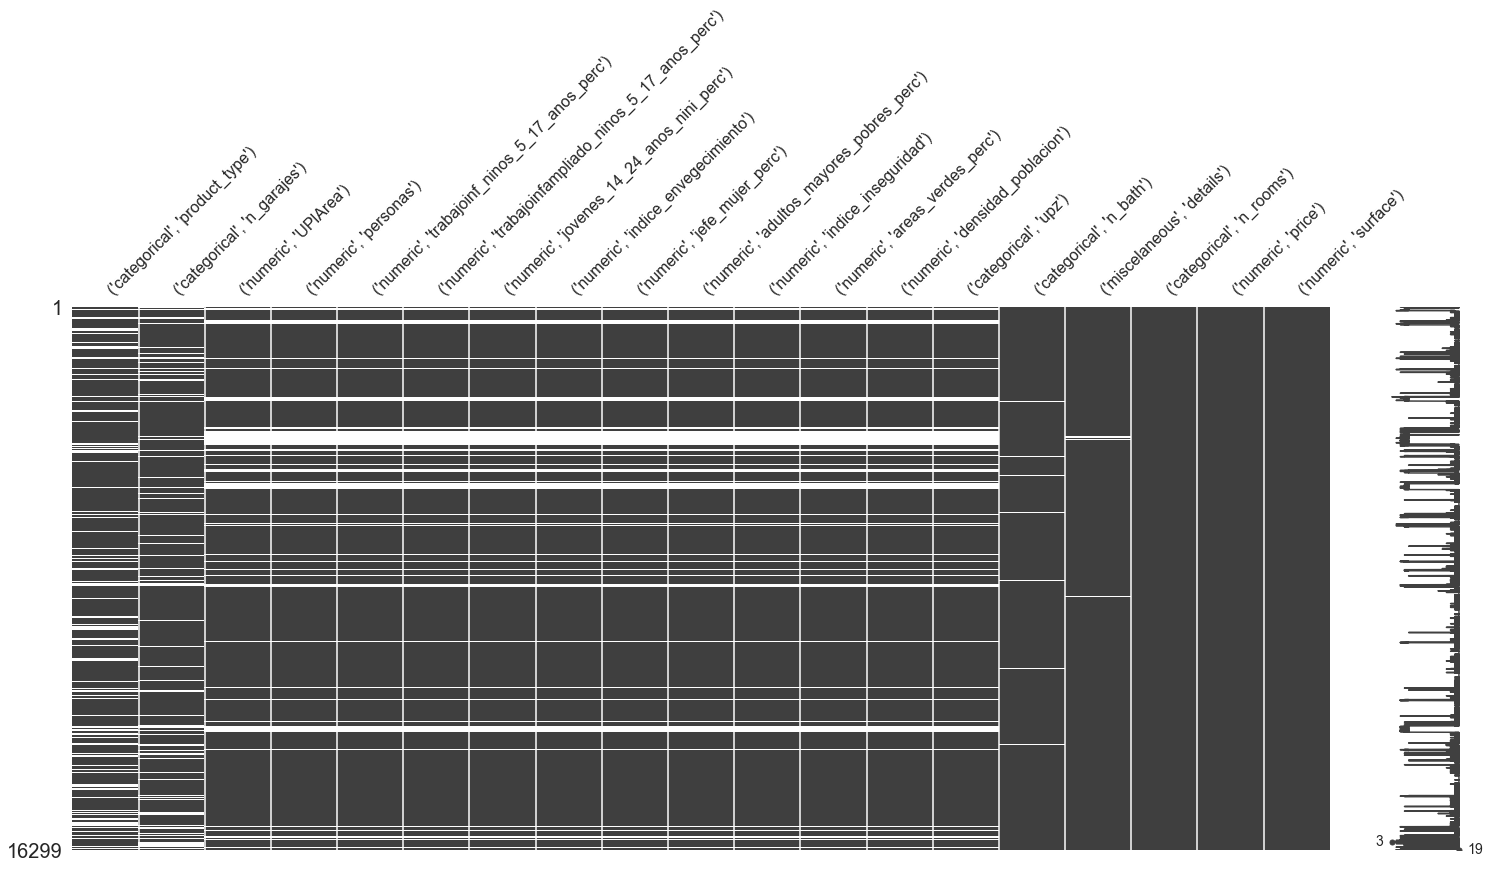

In [93]:
msno.matrix(df_copy[list(df.isnull().sum().nlargest(19).index)], sparkline=True)

Mediante un mapa de calor podemos identificar la correlación entre los valores faltantes, para determinar si existe algún tipo de dependencia en la ausencia de éstos datos. En efecto, notamos como las variables asociadas a las estadísticas incluidas en la sección P1.6 presentan correlación 1 entre ellas y con `upz`, confirmando entonces la clara dependencia de la ausencia de estos datos en base a la ausencia de `upz`. Además, notamos una trivial correlación de 1 entre `surface` y `price_per_m2` debido a que la data faltante(surface=0) genera una imposibilidad en el cálculo de `price_per_m2`(sería infinito).

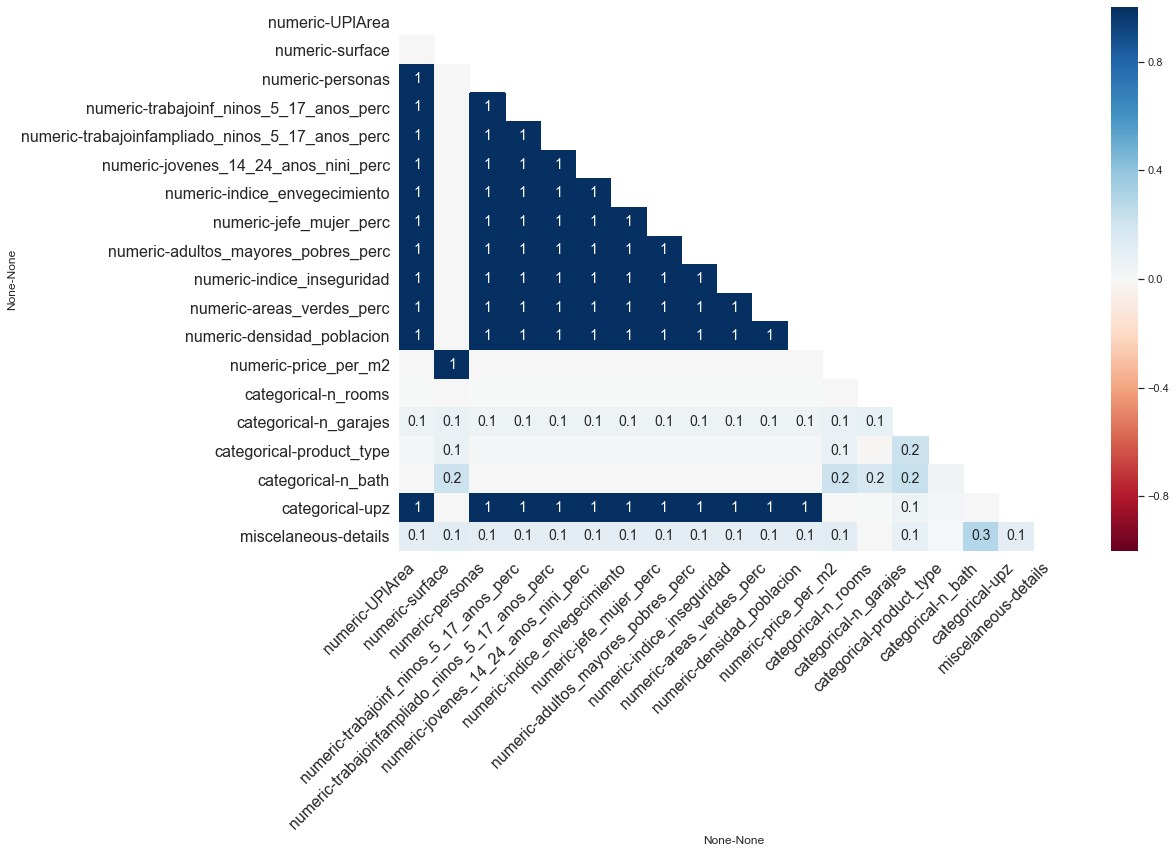

In [94]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df_copy, ax = ax)

A través de un dendograma podemos confirmar la relación de datos faltantes, ahora entre grupos. Confirmamos lo mencionado con las estadísticas y `upz`, junto con la relacion `surface` y `price_per_m2`.

Se observa cómo `product_type` no tiene relación alguna en su ausencia de datos con variables como `property_type`, `surface`, sino mas bien en los rangos de valor de éstas. 

Además notamos que la ausencia de datos en `n_garajes` tambien es ajena a la ausencia de datos en otras variables expuestas acá.

Concluimos entonces que las variables `price_per_m2` y `property_type` presentan un tipo de mecanismo de pérdida de información del tipo MAR, pues su ausencia depende de variables que podemos observar su valor:

`surface` para `price_per_m2`

`property_type`, `surface` para `product_type`

Por otro lado, las estadísticas cumplen la hipótesis MNAR, ya que la ausencia de información en estas variables se explica por la variable ausente `upz`.

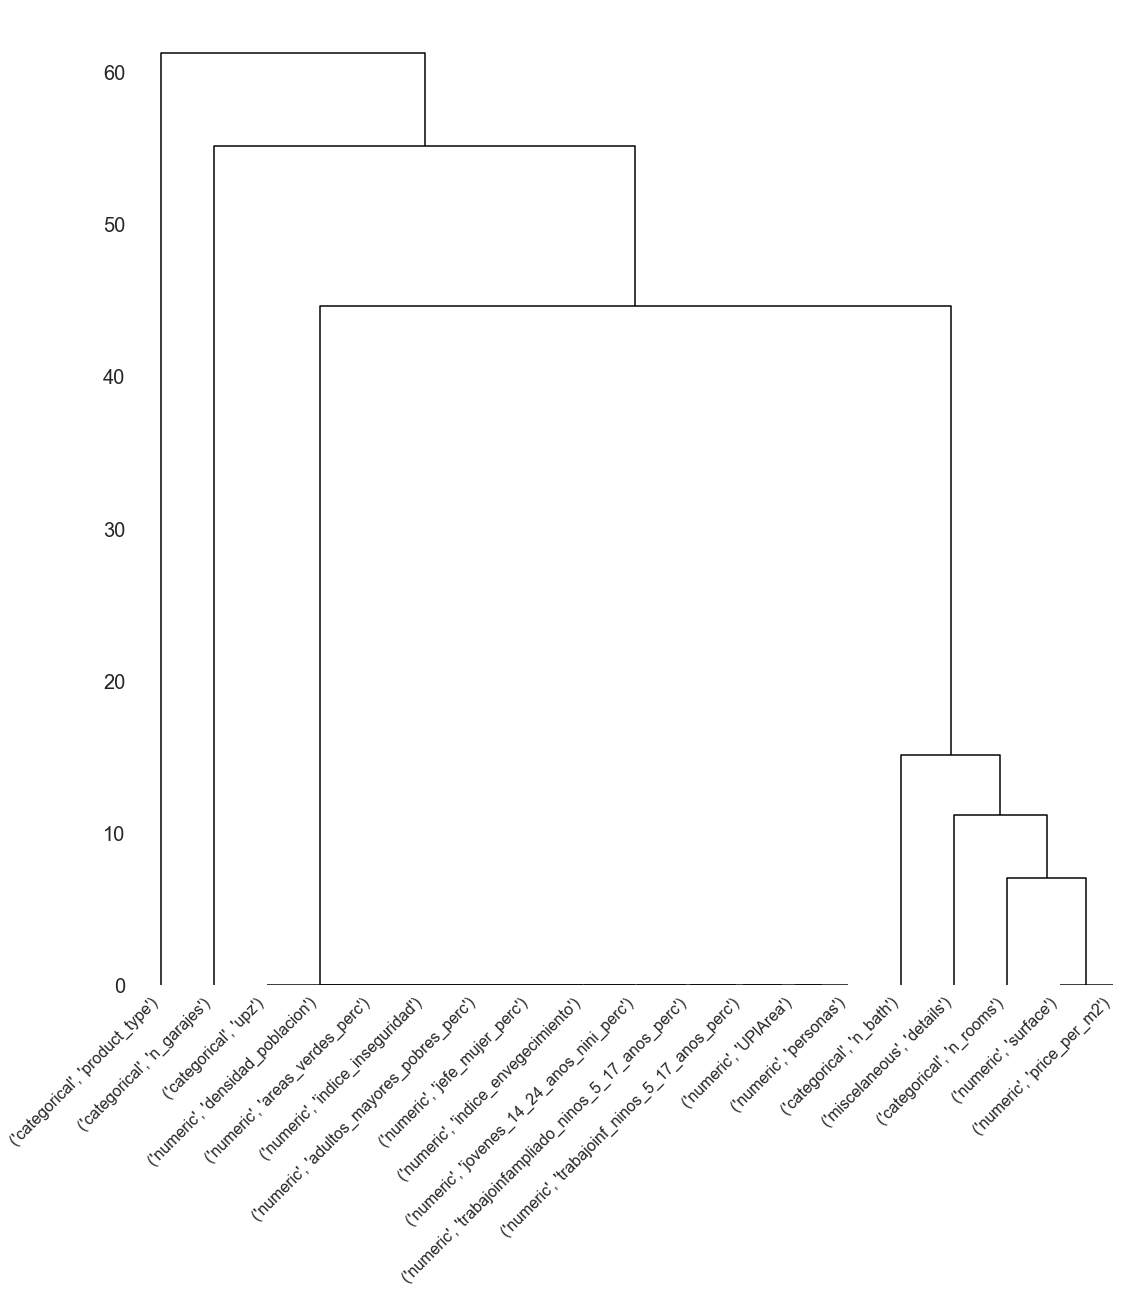

In [95]:
fig, ax = plt.subplots()
msno.dendrogram(df_copy[list(df_copy.isnull().sum().nlargest(19).index)], ax=ax,orientation='top')

In [96]:
###########
# TEST DE LITTLE?

Como los NaN asociados a `upz` corresponden a una perdida de informacion del tipo MNAR, nuestro tratamiento será entonces dropear tales filas. Como los NaN asociados a `product_type` corresponden a valores que ensucian la variable respuesta, tambien se procede a dropear tales filas. 

In [97]:
df_copy.dropna(subset=[('categorical', 'upz'),('categorical','product_type')], axis =0,how='any', inplace=True)
df_copy.reset_index(drop=True,inplace=True)
df_raw = df_copy.copy()

In [98]:
df_copy.isnull().sum()

numeric       UPlArea                                       0
              price                                         0
              surface                                       0
              metrocuadrado_index                           0
              personas                                      0
              trabajoinf_ninos_5_17_anos_perc               0
              trabajoinfampliado_ninos_5_17_anos_perc       0
              jovenes_14_24_anos_nini_perc                  0
              indice_envegecimiento                         0
              jefe_mujer_perc                               0
              adultos_mayores_pobres_perc                   0
              indice_inseguridad                            0
              areas_verdes_perc                             0
              densidad_poblacion                            0
              price_per_m2                                  0
categorical   rent_type                                     0
        

In [99]:
# Obtenemos las modas por columna
cols= indexer(['n_rooms','n_bath','n_garajes'])
modes = df_copy[cols].mode(axis=0,dropna=True)
modes

categorical                 
      n_rooms n_garajes n_bath
0           2         1      2

In [100]:
# Generamos un diccionario de mapeos a utilizar en la imputación
fill_dict={'n_garajes': modes[('categorical','n_garajes')][0],
          'n_rooms': modes[('categorical','n_rooms')][0],
          'n_bath': modes[('categorical','n_bath')][0]
          }
df_copy[cols].isnull().sum()

categorical  n_rooms        27
             n_garajes    1150
             n_bath        135
dtype: int64

In [101]:
# Se procede a imputar
for col in cols:
    df_copy.loc[:,col] = df_copy.fillna(modes[col][0])
df_copy[cols]

categorical                 
          n_rooms n_garajes n_bath
0               4         1      2
1               4         1      2
2               3         1      2
3               4         1      4
4               2         1      1
...           ...       ...    ...
11784           4         1      2
11785           3         1      2
11786           1         1      3
11787           4         1      3
11788           2         1      2

[11789 rows x 3 columns]

In [102]:
# Notamos que todos las modas fueron imputadas
df_copy[cols].isnull().sum()

categorical  n_rooms      0
             n_garajes    0
             n_bath       0
dtype: int64

## Parte 4

Recordemos como distribuye la variable categorica `upz`

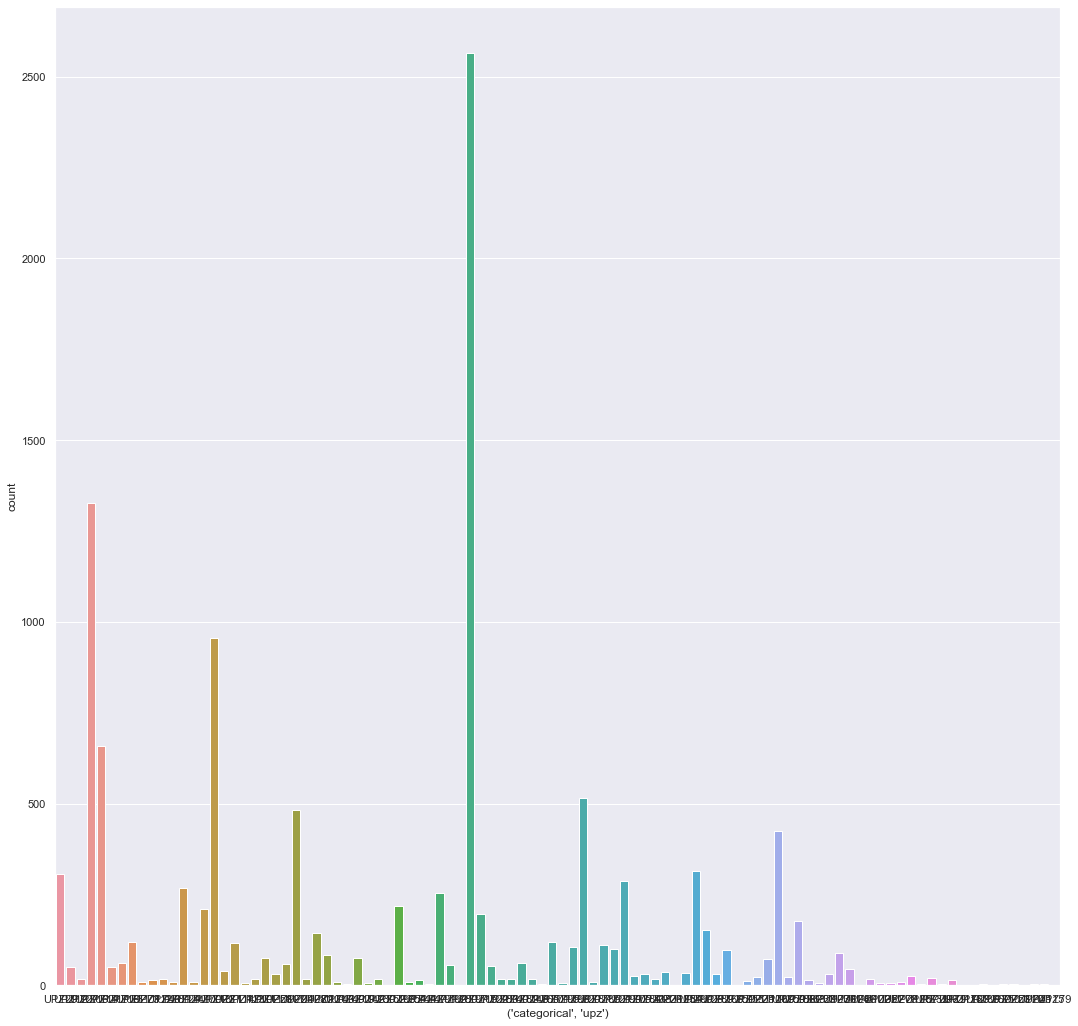

In [103]:
sns.countplot(df_copy[('categorical','upz')])

Generaremos un dataframe identico al actual pero con los cambios realizados de P2.2 para comparar visualizaciones

In [104]:
df_mod = df_copy.copy()
df_mod =  df_mod[(df_mod[('numeric','price_per_m2')]<=10**5) & (df_mod[('numeric','surface')]<=10**3)] 
df_mod

numeric                                                   \
            UPlArea      price surface metrocuadrado_index  personas   
0      3.732645e+06  1900000.0   140.0                30.7  156375.0   
1      3.732645e+06  1900000.0   140.0                33.9  156375.0   
2      3.732645e+06  1900000.0   140.0                19.9  156375.0   
3      3.732645e+06  2000000.0   135.0                55.1  156375.0   
4      3.732645e+06   870000.0    65.0                46.7  156375.0   
...             ...        ...     ...                 ...       ...   
11784  6.638420e+06  1500000.0   160.0                49.4  137971.0   
11785  3.754767e+06  1200000.0   195.0                21.0   83505.0   
11786  1.332392e+06  4000000.0   203.0                30.1   31700.0   
11787  4.964574e+06  5100000.0   265.0                33.6  179732.0   
11788  3.754767e+06   630000.0    65.0                39.4   83505.0   

                                                                               \
      trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                                 1.1                                     0.8   
1                                 1.1                                     0.8   
2                                 1.1                                     0.8   
3                                 1.1                                     0.8   
4                                 1.1                                     0.8   
...                               ...                                     ...   
11784                             1.3                                     6.3   
11785                             0.8                                     7.6   
11786                             2.8                                    24.9   
11787                             0.4                                     1.2   
11788                             0.8                                     7.6   

                                                                          ...  \
      jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                             12.6                  71.1       37.073314  ...   
1                             12.6                  71.1       37.073314  ...   
2                             12.6                  71.1       37.073314  ...   
3                             12.6                  71.1       37.073314  ...   
4                             12.6                  71.1       37.073314  ...   
...                            ...                   ...             ...  ...   
11784                         18.4                  40.0       36.859663  ...   
11785                         13.6                  53.6       39.682834  ...   
11786                         13.5                  67.8       39.156566  ...   
11787                         14.5                  45.4       31.113458  ...   
11788                         13.6                  53.6       39.682834  ...   

      categorical                                                     \
        furnished property_type n_garajes product_type n_bath    upz   
0             0.0          casa         1            2      2  UPZ29   
1             0.0          casa         1            2      2  UPZ29   
2             0.0          casa         1            2      2  UPZ29   
3             0.0          casa         1            2      4  UPZ29   
4             0.0   apartamento         1            7      1  UPZ29   
...           ...           ...       ...          ...    ...    ...   
11784         0.0          casa         1            2      2  UPZ42   
11785         0.0          casa         1            3      2  UPZ39   
11786         0.0          casa         1            3      3  UPZ35   
11787         0.0          casa         1            4      3  UPZ75   
11788         0.0   apartamento         1            7      2  UPZ39   

                       miscela

Buscamos clusterizar los `upz` en base a su valor en `price_per_m2`

In [105]:
# Se propone clusterizar la variable upz mediante kmeans
from sklearn.cluster import KMeans

n_clust = 3 # número de clusters a trabajar

# Se inicializan en paralelo 2 clusterizaciones
clusterizer = KMeans(n_clusters=n_clust)
clusterizer_mod = KMeans(n_clusters=n_clust)

In [106]:
# Clustering mediante la variable de respuesta
# Agrupamos datos por upz y tomamos promedio en la variable de respuesta

# Generamos agrupaciones
grouped_df = df_copy.groupby(by=('categorical','upz')).mean()[('numeric','price_per_m2')]
grouped_df_mod = df_mod.groupby(by=('categorical','upz')).mean()[('numeric','price_per_m2')]

# Guardamos los labels en una serie indexados por el codigo upz
X = clusterizer.fit_predict(grouped_df.to_numpy().reshape(-1,1))
X_mod = clusterizer_mod.fit_predict(grouped_df_mod.to_numpy().reshape(-1,1))

# Generamos los labels
labels = pd.Series(X, index=grouped_df.index, name=('categorical', 'upz_cluster'))
labels_mod = pd.Series(X_mod, index=grouped_df_mod.index, name=('categorical', 'upz_cluster'))

# Se hace merge de los labels en las datas respectivas
df_clust = pd.merge(df_copy, labels, left_on = [('categorical', 'upz')], 
                    right_on=labels.index ,left_index=True,how='left')
df_clust.loc[:,('categorical', 'upz_cluster')] = df_clust[('categorical', 'upz_cluster')].map(lambda x: str(int(x)))
df_clust.reset_index(inplace = True,drop = True )

df_clust_mod = pd.merge(df_mod, labels_mod, left_on = [('categorical', 'upz')], 
                    right_on=labels_mod.index ,left_index=True,how='left')
df_clust_mod.loc[:,('categorical', 'upz_cluster')] = df_clust_mod[('categorical', 'upz_cluster')].map(lambda x: str(int(x)))
df_clust_mod.reset_index(inplace = True,drop = True )

In [107]:
# Vemos los labels de cada data 
print('Sin filtrar: ',df_clust[('categorical','upz_cluster')].unique())
print('Filtrada: ',df_clust_mod[('categorical','upz_cluster')].unique())

Sin filtrar:  ['0' '2' '1']
Filtrada:  ['2' '0' '1']


Aquí notamos un comportamiento extraño en la distribución de los valores por categoría, nuestra hipótesis es que se debe a la potencial presencia de outliers asociados a la variable `price_per_m2`. Sin embargo al estar en escala logarítmica podemos observar una potencial diferencia en las medias por grupo, para confirmar ésto, haremos un test oneway ANOVA sobre `upz_cluster` vs `price_per_m2`.

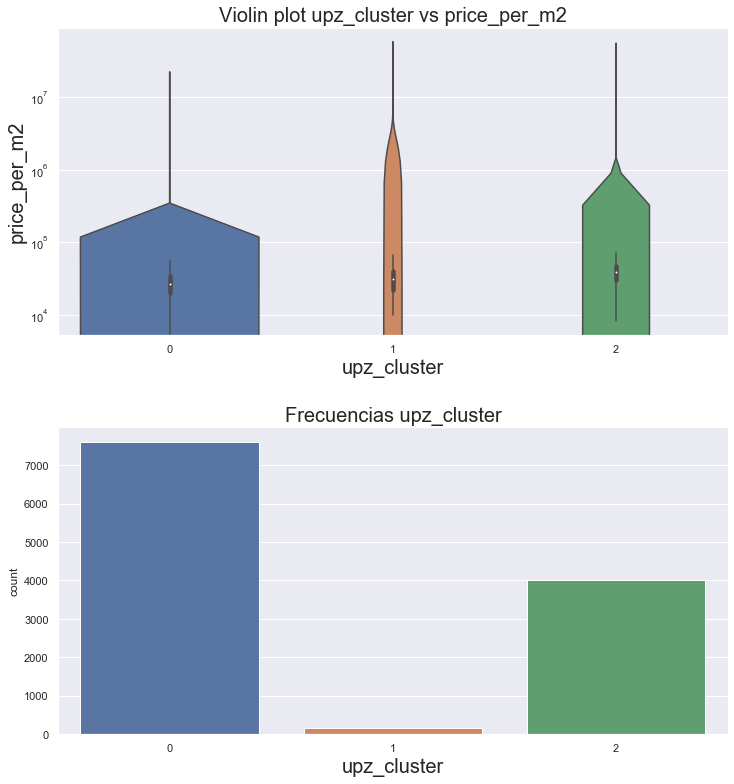

In [108]:
categoricalplot(df_clust,'upz_cluster',log=True)

In [109]:
'''Se realiza el test oneway ANOVA para comprobar la diferencia de medias en la data sin filtrar
'''
idx = indexer(['price_per_m2','upz_cluster'], t_c=df_clust.columns)
grouped = df_clust[idx].groupby(idx[1])
total_groups = grouped.groups.keys()
groups = [group_cleaner(grouped.get_group(str(i)), 'upz_cluster', df_clust) for i in range(n_clust)]

F, p = f_oneway(*groups)
print('Estadistico F:',F)
print('p valor :', p)
alfa = 0.05
print('p<=alfa: ',p <= alfa)

Estadistico F: [21.03061178]
p valor : [7.63449315e-10]
p<=alfa:  [ True]


Veamos qué ocurre si consideramos las modificaciones realizadas en P2.2 a éste dataframe

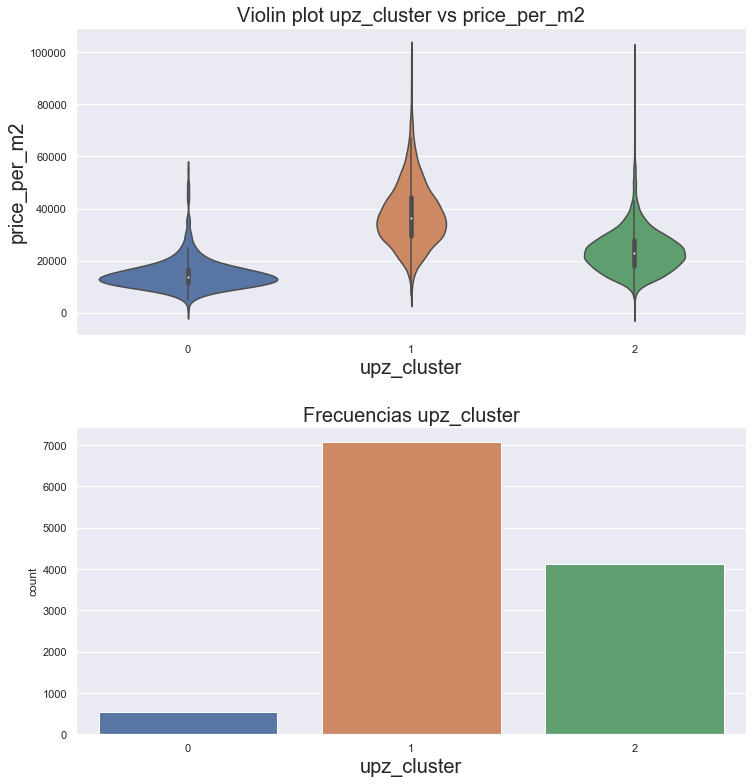

In [110]:
categoricalplot(df_clust_mod,'upz_cluster',log=False)

Notamos que la mejora es considerable en cuanto a la identificación de `price_per_m2` mediante esta clusterización, además podemos observar que la cantidad de datos que se dropean con tal de mejorar a ésta magnitud las representaciones e identificaciones solo corresponde a un 0.4% del total.

In [111]:
diff = df_clust.shape[0]-df_clust_mod.shape[0]
perc_diff = 100 *(df_clust.shape[0]-df_clust_mod.shape[0])/df_clust.shape[0]
print('Luego del filtro como en P2.2, solo {} datos son dropeados, lo cual corresponde a un {}% de la cantidad total de datos'.format(diff,perc_diff))

Luego del filtro como en P2.2, solo 48 datos son dropeados, lo cual corresponde a un 0.40715921621850876% de la cantidad total de datos


Se realiza el test oneway ANOVA con la data filtrada como en P2.2 para comprobar la diferencia de medias. Ésto junto con lo expresado en las idenrificaciónes P2.2 creemos que es evidencia suficiente para seguir trabajando con la data filtrada como en P2.2.

In [112]:
idx = indexer(['price_per_m2','upz_cluster'], t_c=df_clust.columns)
grouped_mod = df_clust_mod[idx].groupby(idx[1])
total_groups_mod = grouped_mod.groups.keys()
groups_mod = [group_cleaner(grouped_mod.get_group(str(i)), 'upz_cluster', df_clust_mod) for i in range(n_clust)]

F, p = f_oneway(*groups_mod)
print('Estadistico F:',F)
print('p valor :', p)
alfa = 0.05
print('p<=alfa: ',p <= alfa)

Estadistico F: [3007.42524264]
p valor : [0.]
p<=alfa:  [ True]


In [113]:
# Asignamos al df_raw éstos labels
df_raw = pd.merge(df_raw, labels_mod, left_on = [('categorical', 'upz')], 
                    right_on=labels_mod.index ,left_index=True,how='left',validate='one_to_one')
df_raw.reset_index(inplace=True,drop=True)

## Parte 5

In [114]:
# Actualizamos df con el clustering realizado en la parte anterior para la data filtrada
df = df_clust_mod.copy()

Veamos ahora si existe dependencia entre variables de interés

In [115]:
interest = ['price','surface','metrocuadrado_index','personas',
            'indice_inseguridad','price_per_m2',
            'n_rooms','n_garajes','n_bath']
idxs = indexer(interest)
idxs.sort()
idxs.remove(('numeric', 'price_per_m2'))
idxs.append(('numeric', 'price_per_m2'))
idxs

[('categorical', 'n_bath'),
 ('categorical', 'n_garajes'),
 ('categorical', 'n_rooms'),
 ('numeric', 'indice_inseguridad'),
 ('numeric', 'metrocuadrado_index'),
 ('numeric', 'personas'),
 ('numeric', 'price'),
 ('numeric', 'surface'),
 ('numeric', 'price_per_m2')]

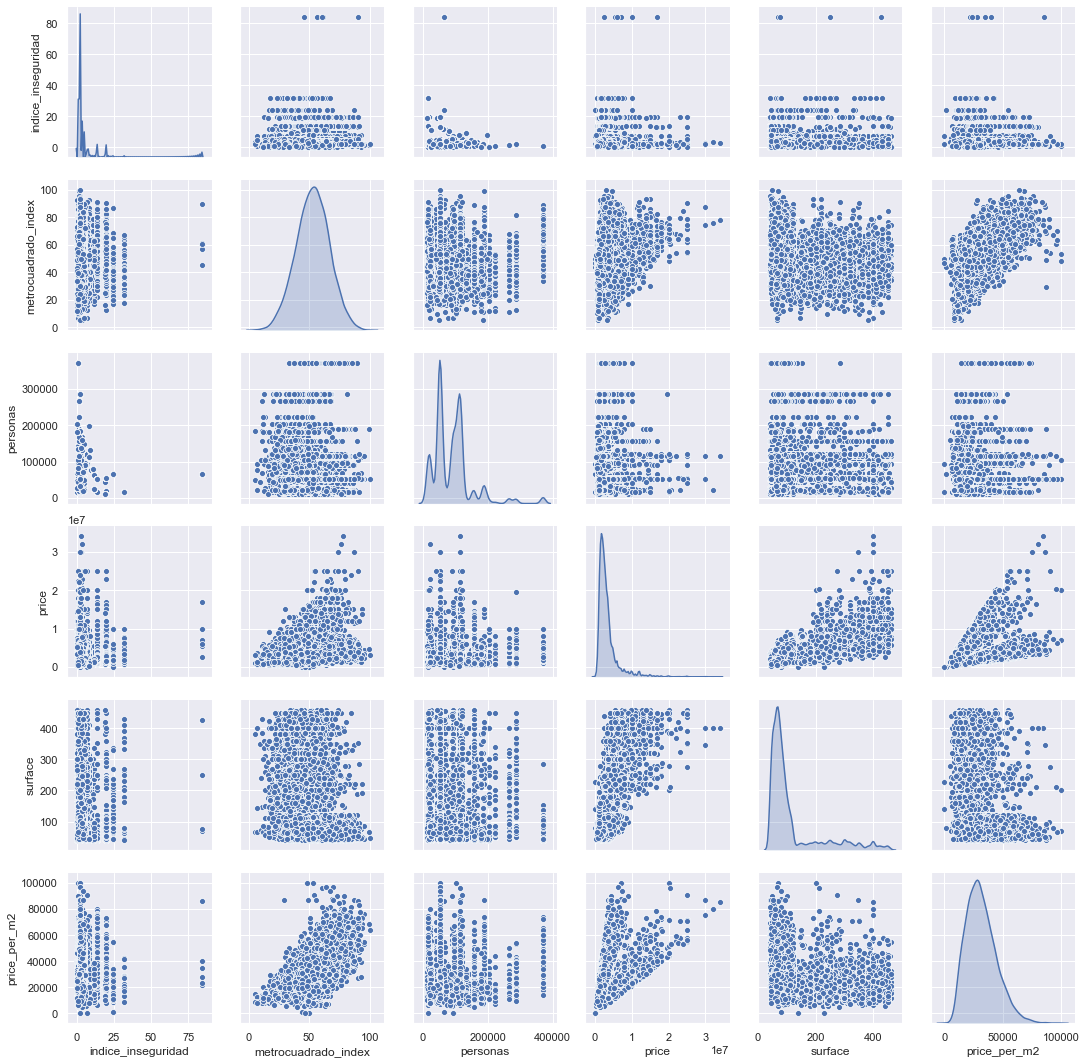

In [116]:
data = df.reindex(idxs, axis=1).droplevel(0,axis=1).dropna()
sns.pairplot(data=data, diag_kind='kde')

Veamos correlacion entre variables por medio de la matríz de correlaciones

In [117]:
corrmatrix = df.corr()
corrmatrix

numeric            \
                                                      UPlArea     price   
numeric     UPlArea                                  1.000000 -0.012397   
            price                                   -0.012397  1.000000   
            surface                                 -0.013350  0.758565   
            metrocuadrado_index                     -0.003540  0.155872   
            personas                                 0.593290  0.002446   
            trabajoinf_ninos_5_17_anos_perc         -0.139326 -0.008543   
            trabajoinfampliado_ninos_5_17_anos_perc -0.408264 -0.045253   
            jovenes_14_24_anos_nini_perc            -0.075423 -0.029515   
            indice_envegecimiento                   -0.101243  0.060143   
            jefe_mujer_perc                         -0.492248  0.082843   
            adultos_mayores_pobres_perc             -0.049630 -0.017851   
            indice_inseguridad                      -0.260081  0.009371   
            areas_verdes_perc                        0.183859  0.029561   
            densidad_poblacion                       0.010480  0.020651   
            price_per_m2                             0.001497  0.249415   
categorical furnished                               -0.020355 -0.000036   

                                                               \
                                                      surface   
numeric     UPlArea                                 -0.013350   
            price                                    0.758565   
            surface                                  1.000000   
            metrocuadrado_index                     -0.238608   
            personas                                 0.050732   
            trabajoinf_ninos_5_17_anos_perc          0.051052   
            trabajoinfampliado_ninos_5_17_anos_perc -0.029796   
            jovenes_14_24_anos_nini_perc             0.079368   
            indice_envegecimiento                   -0.107854   
            jefe_mujer_perc                         -0.088806   
            adultos_mayores_pobres_perc              0.051186   
            indice_inseguridad                       0.002883   
            areas_verdes_perc                        0.079893   
            densidad_poblacion                       0.099190   
            price_per_m2                            -0.303980   
categorical furnished                               -0.145290   

                                                                         \
                                                    metrocuadrado_index   
numeric     UPlArea                                           -0.003540   
            price                                              0.155872   
            surface                                           -0.238608   
            metrocuadrado_index                                1.000000   
            personas                                          -0.062823   
            trabajoinf_ninos_5_17_anos_perc                   -0.072602   
            trabajoinfampliado_ninos_5_17_anos_perc            0.006269   
            jovenes_14_24_anos_nini_perc                      -0.124789   
            indice_envegecimiento                              0.215822   
            jefe_mujer_perc                                    0.250142   
            adultos_mayores_pobres_perc                       -0.063710   
            indice_inseguridad                                 0.008107   
            areas_verdes_perc                                 -0.085086   
            densidad_poblacion                                -0.112859   
            price_per_m2                                       0.679871   
categorical furnished                                          0.244061   

                                                               \
                                                     personas   
numeric     UPlArea                                

In [118]:
col = indexer(['price_per_m2'])
corrmatrix[col].nlargest(20,col)

numeric
                                                    price_per_m2
numeric     price_per_m2                                1.000000
            metrocuadrado_index                         0.679871
categorical furnished                                   0.369736
numeric     jefe_mujer_perc                             0.340593
            indice_envegecimiento                       0.289909
            price                                       0.249415
            trabajoinfampliado_ninos_5_17_anos_perc     0.006236
            indice_inseguridad                          0.002528
            UPlArea                                     0.001497
            adultos_mayores_pobres_perc                -0.077923
            personas                                   -0.085562
            trabajoinf_ninos_5_17_anos_perc            -0.109150
            areas_verdes_perc                          -0.123588
            densidad_poblacion                         -0.152270
            jovenes_14_24_anos_nini_perc               -0.167740
            surface                                    -0.303980

En primera instancia analizamos la correlación entre todas las variables numéricas mediante un mapa de calor(la varible objetivo están en la última fila).

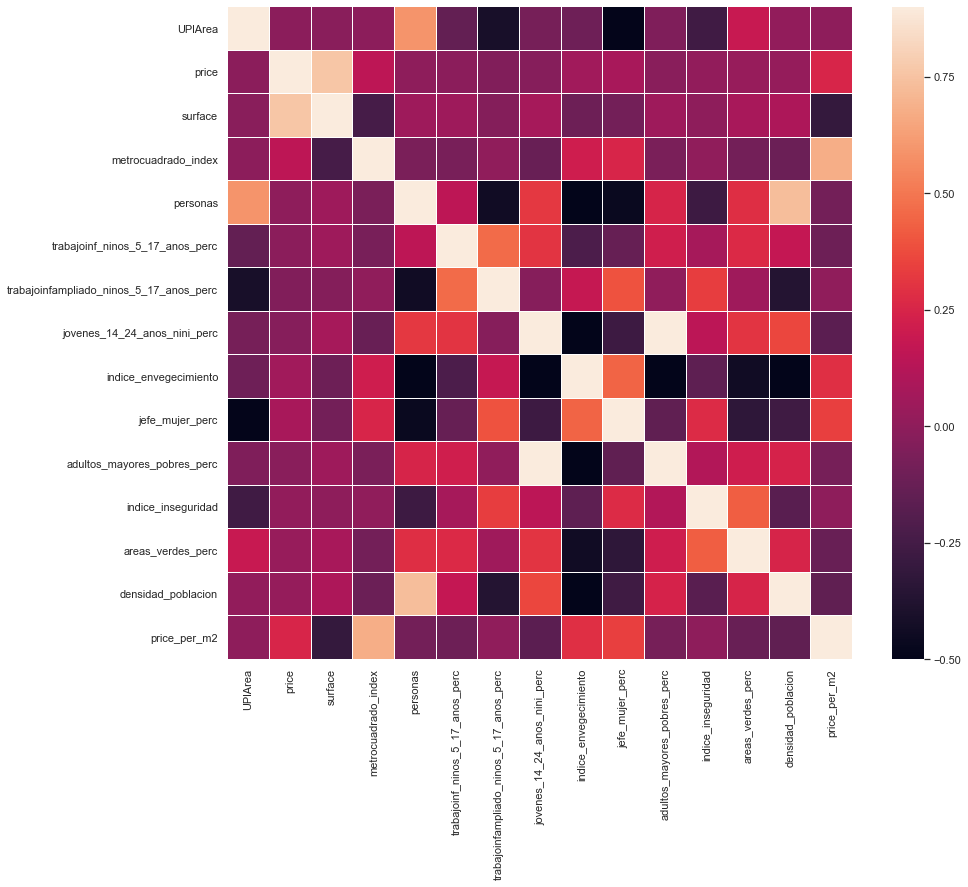

In [119]:
corrmat = df['numeric'].corr()
columnas = list(corrmat.columns)

corrmat = corrmat.reindex(index = columnas, columns = columnas)

fig, ax = plt.subplots(figsize=[14, 12])

sns.heatmap(corrmat, vmin=-.5, vmax=.9, linewidths=.01)

Se puede apreciar alta correlación (positiva y negativa) entre algunos pares de variables. Para ubicarlos hacemos un rearreglo 1D multi-índice y buscamos los que tengan módulo más alto(distinto de 1).

In [120]:
unoD=corrmat.stack()
unoD[unoD[unoD<1].abs().nlargest(20).index][::2]

jovenes_14_24_anos_nini_perc  adultos_mayores_pobres_perc    0.905034
                              indice_envegecimiento         -0.869541
price                         surface                        0.758565
personas                      densidad_poblacion             0.731749
indice_envegecimiento         adultos_mayores_pobres_perc   -0.717477
metrocuadrado_index           price_per_m2                   0.679871
UPlArea                       personas                       0.593290
indice_envegecimiento         densidad_poblacion            -0.517507
personas                      indice_envegecimiento         -0.506443
UPlArea                       jefe_mujer_perc               -0.492248
dtype: float64

Se acordó un umbral de 0.7 para definir una correlación potencialmente problemática en cuanto a la colinearidad.

En vista de lo anterior notamos una estrecha relación entre los grupos

`jovenes_14_24_anos_nini_perc`
`adultos_mayores_pobres_perc`
`indice_envegecimiento`

`personas`
`densidad_poblacion`

de las cuales elegimos una de cada grupo (la última) para evitar colinearidad.

Cabe destacar que el par (`price`,`surface`) también tiene un valor muy alto, pero como estas variables no se considerarán al momento de estimar `price_per_m2` al ser las generadoras de esta variable, no se estudia con mayor detalle.

Por otro lado vemos que `metrocuadrado_index` tiene una alta correlación con la variable a explicar, por lo que es un buen candidato para la selección final. Para ver cómo se relacionan las otras variables con `price_per_m2` analizamos su columna.

Incluyendo ahora las variables que no presentan una correlación superior al umbral, tenemos a priori los siguientes candidatos a ser incluidos en el modelo final:

`densidad_poblacion` 

`indice_envegecimiento`

`jefe_mujer_perc` 

`areas_verdes_perc` 

`trabajoinf_ninos_5_17_anos_perc`

`trabajoinfampliado_ninos_5_17_anos_perc`

`indice_inseguridad`

In [121]:
corrmat['price_per_m2'].sort_values(ascending = False)

price_per_m2                               1.000000
metrocuadrado_index                        0.679871
jefe_mujer_perc                            0.340593
indice_envegecimiento                      0.289909
price                                      0.249415
trabajoinfampliado_ninos_5_17_anos_perc    0.006236
indice_inseguridad                         0.002528
UPlArea                                    0.001497
adultos_mayores_pobres_perc               -0.077923
personas                                  -0.085562
trabajoinf_ninos_5_17_anos_perc           -0.109150
areas_verdes_perc                         -0.123588
densidad_poblacion                        -0.152270
jovenes_14_24_anos_nini_perc              -0.167740
surface                                   -0.303980
Name: price_per_m2, dtype: float64

Tenemos las siguientes variables categóricas de interés

`upz_cluster`

`product_type`

`n_rooms`

`n_bath`

`n_garajes`

`furnished`

Buscamos ahora verificar estadísticamente si las variables generan una diferencia significativa entre los grupos `price_per_m2`. Para ello haremos test oneway ANOVA.

In [122]:
from scipy.stats import f_oneway

# Recordemos que 'upz_cluster' y 'n_garajes' ya fueron validadas en P2.2 y P2.4 respectivamente
categoric_vars = ['furnished','product_type', 'n_rooms', 'n_bath']

for col in categoric_vars:
    print('{}:'.format(col))
    idx = indexer(['price_per_m2',col])
    grouped = df[idx].groupby(idx[1])
    total_groups = grouped.groups.keys()
    groups = [group_cleaner(grouped.get_group(i), col) for i in total_groups]
    
    F,p = f_oneway(*groups)
    print('Estadistico F:',F)
    print('p valor :', p)
    alpha = 0.05
    reject= p <= alpha
    if reject:
        print('Se rechaza la nula para {}'.format(col))
    else:
        print('NO se rechaza la nula para {}'.format(col))

furnished:
Estadistico F: [1858.8949015]
p valor : [0.]
Se rechaza la nula para furnished
product_type:
Estadistico F: [332.31476106]
p valor : [0.]
Se rechaza la nula para product_type
n_rooms:
Estadistico F: [481.31429779]
p valor : [0.]
Se rechaza la nula para n_rooms
n_bath:
Estadistico F: [147.55233352]
p valor : [2.09042829e-152]
Se rechaza la nula para n_bath


Notamos que para cada variable considera se rechaza la nula, por lo tanto cada variable presenta una separación estadística considerable para `price_per_m2`.

In [123]:
#########
# POSIBLE CORRECCION?

Nos interesa ahora ver si existe algun tipo de relación entre las variables numéricas y categóricas que estamos considerando.

In [124]:
'''Procedemos a testear la significancia de cada variable en la
descripción de 'price_per_m2' utilizando el test t.
'''
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

numeric_vars = ['densidad_poblacion', 'indice_envegecimiento', 'jefe_mujer_perc', 
               'areas_verdes_perc', 'trabajoinf_ninos_5_17_anos_perc', 
               'trabajoinfampliado_ninos_5_17_anos_perc', 'indice_inseguridad']

ppm2 = np.array(df[('numeric','price_per_m2')])

alfa = 0.05
n = len(numeric_vars)
reject_matrix = np.zeros((n,n))
for i in range(n):
    var1 = numeric_vars[i]
    arr1 = np.array(df[('numeric',var1)].dropna())
    print(var1)
    for j in range(i+1,n):
        var2 = numeric_vars[j]
        arr2 = np.array(df[('numeric',var2)].dropna())
        #t,p = testt_ind(arr1,arr2,equal_var=False)
        t,p = ks_2samp(arr1,arr2)
        print('{}:\n Valor del estadístico: {}\n Valor de p: {}'.format(var2,t,p))
        reject = p < alfa
        if reject:
            reject_matrix[i][j] = 1
            #print('Se rechaza la nula, {} tiene significancia'.format(var))
            
reject_matrix

densidad_poblacion
indice_envegecimiento:
 Valor del estadístico: 1.0
 Valor de p: 0.0
jefe_mujer_perc:
 Valor del estadístico: 1.0
 Valor de p: 0.0
areas_verdes_perc:
 Valor del estadístico: 1.0
 Valor de p: 0.0
trabajoinf_ninos_5_17_anos_perc:
 Valor del estadístico: 0.5748232688868069
 Valor de p: 0.0
trabajoinfampliado_ninos_5_17_anos_perc:
 Valor del estadístico: 1.0
 Valor de p: 0.0
indice_inseguridad:
 Valor del estadístico: 0.9897794055020867
 Valor de p: 0.0
indice_envegecimiento
jefe_mujer_perc:
 Valor del estadístico: 0.833830167788093
 Valor de p: 0.0
areas_verdes_perc:
 Valor del estadístico: 0.7875819776850354
 Valor de p: 0.0
trabajoinf_ninos_5_17_anos_perc:
 Valor del estadístico: 1.0
 Valor de p: 0.0
trabajoinfampliado_ninos_5_17_anos_perc:
 Valor del estadístico: 0.8167106720040882
 Valor de p: 0.0
indice_inseguridad:
 Valor del estadístico: 0.9569883314879483
 Valor de p: 0.0
jefe_mujer_perc
areas_verdes_perc:
 Valor del estadístico: 0.5025125628140703
 Valor de p: 0

array([[0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [125]:
from scipy.stats import ks_2samp
arr1=np.array(df[('numeric','jovenes_14_24_anos_nini_perc')].dropna())
arr2=np.array(df[('numeric','adultos_mayores_pobres_perc')].dropna())
t,p = ks_2samp(arr1,arr2)
print('Valor del estadístico: {}\n Valor de p: {}'.format(t,p))

Valor del estadístico: 0.34732986968742013
 Valor de p: 0.0


In [126]:
#########
# POSIBLE CORRECCION?

## Parte 6

Generamos un duplicado del df obtenido de la clusterización en P2.4 para generar ciertas transformaciones.

In [127]:
#df_transformed = df_clust.copy()
df_transformed= df_clust_mod.copy()
df_transformed.isnull().sum()

numeric       UPlArea                                     0
              price                                       0
              surface                                     0
              metrocuadrado_index                         0
              personas                                    0
              trabajoinf_ninos_5_17_anos_perc             0
              trabajoinfampliado_ninos_5_17_anos_perc     0
              jovenes_14_24_anos_nini_perc                0
              indice_envegecimiento                       0
              jefe_mujer_perc                             0
              adultos_mayores_pobres_perc                 0
              indice_inseguridad                          0
              areas_verdes_perc                           0
              densidad_poblacion                          0
              price_per_m2                                0
categorical   rent_type                                   0
              n_rooms                   

In [128]:
columnas = ['UPlArea','price','surface','metrocuadrado_index','personas',
           'trabajoinf_ninos_5_17_anos_perc','trabajoinfampliado_ninos_5_17_anos_perc',
           'jovenes_14_24_anos_nini_perc','indice_envegecimiento','jefe_mujer_perc',
            'adultos_mayores_pobres_perc','indice_inseguridad','areas_verdes_perc',
            'areas_verdes_perc','densidad_poblacion','price_per_m2',
            
            'n_garajes','upz_cluster','furnished','rent_type','n_rooms','product_type',
            'property_type','n_bath']

cols = indexer(columnas, t_c = df_transformed.columns)
df_transformed = df_transformed[cols]
df_transformed.isnull().sum()

numeric      UPlArea                                    0
             price                                      0
             surface                                    0
             metrocuadrado_index                        0
             personas                                   0
             trabajoinf_ninos_5_17_anos_perc            0
             trabajoinfampliado_ninos_5_17_anos_perc    0
             jovenes_14_24_anos_nini_perc               0
             indice_envegecimiento                      0
             jefe_mujer_perc                            0
             adultos_mayores_pobres_perc                0
             indice_inseguridad                         0
             areas_verdes_perc                          0
             densidad_poblacion                         0
             price_per_m2                               0
categorical  rent_type                                  0
             n_rooms                                    0
             f

Debemos transformar algunas variables categoricas a labels según corresponda

In [129]:
numerics= indexer(['UPlArea','price','surface','metrocuadrado_index','personas',
           'trabajoinf_ninos_5_17_anos_perc','trabajoinfampliado_ninos_5_17_anos_perc',
           'jovenes_14_24_anos_nini_perc','indice_envegecimiento','jefe_mujer_perc',
           'adultos_mayores_pobres_perc','indice_inseguridad','areas_verdes_perc',
           'areas_verdes_perc','densidad_poblacion','price_per_m2'], t_c = df_transformed.columns)
ordinales = indexer(['n_rooms','n_bath','n_garajes'], t_c = df_transformed.columns)
no_ordinales = indexer(['furnished','rent_type','property_type','product_type','upz_cluster'], t_c = df_transformed.columns)
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [130]:
data = df_transformed[numerics].dropna().copy()
idx = data.index
#scaler=StandardScaler()
#scaler=RobustScaler()
scaler=MinMaxScaler()
newdata = scaler.fit_transform(data)
newdata = pd.DataFrame(newdata, columns=pd.MultiIndex.from_tuples(numerics))
df_transformed.loc[:,numerics] = newdata

for col in ordinales:
    data = df_transformed[col].dropna().copy()
    idx = data.index
    enc = OrdinalEncoder()
    X = data.values.reshape([-1,1])
    transformed = enc.fit_transform(X)
    newcol = pd.Series(data = transformed.flatten(), index= idx)
    df_transformed.loc[idx,col] = newcol
    
for col in no_ordinales:
    data = df_transformed[col].dropna().copy()
    idx = data.index
    ohenc = OneHotEncoder(categories='auto',sparse=False)
    X = data.values.reshape([-1,1])
    transformed = ohenc.fit_transform(X)
    feature_names = ohenc.get_feature_names()
    feature_names = [name.replace('x0_','{}_'.format(col[1])) for name in feature_names]
    feature_names = [('categorical',name) for name in feature_names]
    newcols = pd.DataFrame(data = transformed, columns=pd.MultiIndex.from_tuples(feature_names), index= idx)
    df_transformed = df_transformed.drop(columns=col).join(newcols)

df_transformed.head(10)

numeric                                                    \
    UPlArea     price   surface metrocuadrado_index  personas   
0  0.428948  0.055882  0.237914            0.269758  0.403565   
1  0.428948  0.055882  0.237914            0.303477  0.403565   
2  0.428948  0.055882  0.237914            0.155954  0.403565   
3  0.428948  0.058824  0.226006            0.526870  0.403565   
4  0.428948  0.025588  0.059300            0.438356  0.403565   
5  0.428948  0.025588  0.059300            0.062171  0.403565   
6  0.428948  0.025588  0.071207            0.245522  0.403565   
7  0.428948  0.025588  0.071207            0.276080  0.403565   
8  0.428948  0.025588  0.059300            0.262381  0.403565   
9  0.428948  0.025588  0.059300            0.407798  0.403565   

                                                                           \
  trabajoinf_ninos_5_17_anos_perc trabajoinfampliado_ninos_5_17_anos_perc   
0                        0.314286                                0.005573   
1                        0.314286                                0.005573   
2                        0.314286                                0.005573   
3                        0.314286                                0.005573   
4                        0.314286                                0.005573   
5                        0.314286                                0.005573   
6                        0.314286                                0.005573   
7                        0.314286                                0.005573   
8                        0.314286                                0.005573   
9                        0.314286                                0.005573   

                                                                      ...  \
  jovenes_14_24_anos_nini_perc indice_envegecimiento jefe_mujer_perc  ...   
0                     0.288136               0.42688        0.518026  ...   
1                     0.288136               0.42688        0.518026  ...   
2                     0.288136               0.42688        0.518026  ...   
3                     0.288136               0.42688        0.518026  ...   
4                     0.288136               0.42688        0.518026  ...   
5                     0.288136               0.42688        0.518026  ...   
6                     0.288136               0.42688        0.518026  ...   
7                     0.288136               0.42688        0.518026  ...   
8                     0.288136               0.42688        0.518026  ...   
9                     0.288136               0.42688        0.518026  ...   

     categorical                                                              \
  product_type_2 product_type_3 product_type_4 product_type_5 product_type_6   
0            1.0            0.0            0.0            0.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            1.0            0.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   
5            0.0            0.0            0.0            0.0            0.0   
6            0.0            0.0            0.0            0.0            0.0   
7            0.0            0.0            0.0            0.0            0.0   
8            0.0            0.0            0.0            0.0            0.0   
9            0.0            0.0            0.0            0.0            0.0   

                                                                           
  product_type_7 product_type_8 upz_cluster_0 upz_cluster_1 upz_cluster_2  
0            0.0            0.0           0.0           0.0           1.0  
1            0.0            0.0           0.0           0.0           1.0  
2            0.0            0.0           0.0           0.0           1.0  
3            0.0            0.0 

In [131]:
df_transformed.columns

MultiIndex([(    'numeric',                                 'UPlArea'),
            (    'numeric',                                   'price'),
            (    'numeric',                                 'surface'),
            (    'numeric',                     'metrocuadrado_index'),
            (    'numeric',                                'personas'),
            (    'numeric',         'trabajoinf_ninos_5_17_anos_perc'),
            (    'numeric', 'trabajoinfampliado_ninos_5_17_anos_perc'),
            (    'numeric',            'jovenes_14_24_anos_nini_perc'),
            (    'numeric',                   'indice_envegecimiento'),
            (    'numeric',                         'jefe_mujer_perc'),
            (    'numeric',             'adultos_mayores_pobres_perc'),
            (    'numeric',                      'indice_inseguridad'),
            (    'numeric',                       'areas_verdes_perc'),
            (    'numeric',                      'densidad_pobla

In [132]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 0.8)

In [133]:
# se clusteriza y se obtiene la proporción de outliers
X = df_transformed.to_numpy()
ol = outlier_detection.fit_predict(X)
(ol == -1).sum()/X.shape[0]

0.07333276552252789

In [134]:
# asignamos los clusters a una nueva columna y se mapea de forma que outlier=-1, inlier=1
df_clust_mod[('categorical', 'outlier')] = ol
data = df_clust_mod.copy()
data.columns = data.columns.droplevel()
data['outlier'] = data['outlier'].map(lambda x: 1 if x >=0 else -1)

# se crea una tabla de doble entrada para visualizar las distribuciones
kwargs = {'index': data['upz_cluster'], 'columns': data['outlier']}
table = pd.crosstab(**kwargs, margins=True)
table

outlier,-1,1,All
upz_cluster,,,
0,102,438,540
1,309,6772,7081
2,450,3670,4120
All,861,10880,11741


A primera vista es posible decir que en proporción, los outliers están distribuidos uniformemente a lo largo de los upz_clusters, es decir, no hay alguno de los clusters en particular que tienda a contener más outliers que los demás, sin embargo, aprovechando que las frecuencias observadas son mayores que 5 haremos un test chi 2 para asegurar esta inedependencia, si las frecuencias esperadas son también mayores que 5, entonces se puede asegurar la confiabilidad del test

In [135]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
print(p < 0.01)
expected

True


array([[   39.59969338,   500.40030662,   540.        ],
       [  519.26931267,  6561.73068733,  7081.        ],
       [  302.13099395,  3817.86900605,  4120.        ],
       [  861.        , 10880.        , 11741.        ]])

In [136]:
# repetimos el proceso esta vez viendo la distribución de outliers con respecto a product_type
kwargs['index'] = data['product_type']
table = pd.crosstab(**kwargs, margins=True)
table

outlier,-1,1,All
product_type,,,
1,44,166,210
2,102,306,408
3,159,346,505
4,240,805,1045
5,156,338,494
6,22,2862,2884
7,70,3402,3472
8,68,2655,2723
All,861,10880,11741


In [137]:
chi2, p, dof, expected = chi2_contingency(table)
print(p < 0.01)
expected

True


array([[   15.39988076,   194.60011924,   210.        ],
       [   29.91976833,   378.08023167,   408.        ],
       [   37.03304659,   467.96695341,   505.        ],
       [   76.63273997,   968.36726003,  1045.        ],
       [   36.22638617,   457.77361383,   494.        ],
       [  211.49169577,  2672.50830423,  2884.        ],
       [  254.61136189,  3217.38863811,  3472.        ],
       [  199.68512052,  2523.31487948,  2723.        ],
       [  861.        , 10880.        , 11741.        ]])

# P3

## Parte 1

In [138]:
from sklearn.base import BaseEstimator,RegressorMixin

class RegresionBayesianaEmpirica(BaseEstimator,RegressorMixin):
    
    def __init__(self, alpha=0.01, beta=0.01, tol=1e-5, maxiter=200):
        self.alpha = alpha
        self.beta = beta
        #self.set_params(alpha=alpha_0,beta=beta_0)
        self.tol=tol
        self.maxiter = maxiter
        self.X = None
        self.y = None
    
    @property
    def X(self):
        return self.__X
    
    @property
    def y(self):
        return self.__y
    
    @X.setter
    def X(self, X):
        self.__X = X
#         if X.shape[0] == len(y):
#             self.__X = X
#         else:
#             raise ValueError('X debe tener la misma cantidad de filas que y')
        
    @y.setter
    def y(self,y):
        self.__y = y
#         if X.shape[0] == len(y):
#             self.__y = y
#         else:
#             raise ValueError('y debe tener la misma cantidad de filas que X')

    
    def get_posteriori(self, X, y, alpha, beta):
        S_n_inv = alpha * np.eye(X.shape[1]) + beta * X.T.dot(X)
        S_n = np.linalg.inv(S_n_inv)
        m_n = beta * S_n.dot(X.T).dot(y)
        return m_n, S_n
    
    def fit(self, X, y):
        # Se verifican las dimensiones
        if X.shape[0] == len(y):
            # Se asocia al objeto la data con la que se realizó el fit
            self.X = X
            self.y = y
        else:
            raise ValueError('la dimensión de y debe coincidir con la cantidad de filas que X')

        #Se inicializan las iteraciones y el diff 
        iterations=0
        diff = 2*self.tol
        # Se obtienen los parámetros alfa,beta y se calcular m_n, S_n en funcion de éstos
#         alfa, beta = self.get_params()['alpha'], self.get_params()['beta']
        alfa = self.alpha
        beta = self.beta
        propios=[np.real_if_close(val) for val in np.linalg.eig(beta*X.T.dot(X))[0]]
        
        while (diff >= self.tol) and (iterations <= self.maxiter):
        
            m_n, S_n = self.get_posteriori(X, y, alfa, beta)
        
            # Se calcula gamma en función de los valores anteriores
#             matrix = beta*X.T.dot(X)
#             [val/(alpha+val) for val in np.linalg.eig(matrix)][0]
            gamma = np.sum([val/(alpha+val) for val in propios])
            
            # Se calculan los nuevos alfa y beta
            new_alfa = gamma / (m_n.T.dot(m_n))
            
            new_beta = 1/(1/(X.shape[0]-gamma) * np.sum([(y[i]-m_n.T.dot(X[i,:]))**2 for i in range(X.shape[0])]))
            
            # Se guarda al cambio de los parámetros en norma l2
            diff = np.max([abs(alfa-new_alfa), abs(beta-new_beta)])
            
            # Se muestra en pantalla el estado actual
            if iterations%50==0:
                print('Iteración {}:\nalpha = {}\nbeta = {}\n'.format(iterations,new_alfa,new_beta))
            
            # Se fijan los nuevos parámetros
            #self.set_params(alpha=new_alfa, beta=new_beta)
            alfa = new_alfa
            beta = new_beta
                
            # Se sigue iterando
            iterations+=1
        
        self.alpha = alfa
        self.beta = beta
        print('Fit Terminado en la iteración {}, con diferencias entre actualizaciones (en norma 2) {}'.format(iterations,diff))
        return self
    
    def predict(self,X_,return_std=False):
        m_n, S_n = self.get_posteriori(self.X,self.y,self.alpha,self.beta)
        
        y_ = X_.dot(m_n)
        #y_std = 1/beta + x.T.dot(S_n).dot(x)
        y_std = []
        for i in range(len(X_)):
            x = X_[i]
            sigma2_n = 1/self.beta + x.T.dot(S_n).dot(x)
            y_std.append(np.sqrt(sigma2_n))
        
        if return_std:
            return y_, y_std
        else:
            return y_


## Parte 2

Comenzamos realizando un test de normalidad sobre las variables numéricas dado que los valóres más extremos fueron removidos por los argumentos presentados en anteriores preguntas. De esta forma se decidirá cuales de las variables numéricas con aptas para usar `StandardScaler`.

In [139]:
from scipy.stats import normaltest as nt
print(df_raw['categorical'].columns)
s, p = nt(df_raw['numeric'], axis=0)
p<0.05

Index(['rent_type', 'n_rooms', 'furnished', 'property_type', 'n_garajes',
       'product_type', 'n_bath', 'upz', 'upz_cluster'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Creamos una copia de la data a trabajar, dropeando las variables miscelaneas junto con `price`, `surface`, `property_type` y `upz`. Además dropeamos el nivel más externo del multiíndice por comodidad. Finalmente se dropean los valores extremos encontrados en P2.2

In [140]:
d = df_raw.drop(columns='miscelaneous', level=0).drop(columns=['price', 'surface', 'property_type', 'upz'],level=1).copy()
d.columns = d.columns.droplevel()
d = d[(d['price_per_m2']>1)&(d['price_per_m2']<10**5)]

In [141]:
# Se hacen los imports necesarios para las transformaciones
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures

Definimos ahora listas de variables acorde al tratamiento a darles. Dados los resultados del test de normalidad, todas las variables serán consideradas NO provenientes de una normal. Es por esta razón que no se hará uso del objeto `StandardScaler`.

In [142]:
categorical_vars = ['product_type','rent_type', 'upz_cluster', 'furnished']

ordinal_vars = ['n_rooms', 'n_bath', 'n_garajes']
ordinal_categories = [['1', '2', '3', '4', '5', '5+'],
                      ['1', '2', '3', '4', '5', '5+'],
                      ['1', '2', '3', '4', '4+']
                     ]
numeric_vars = ['UPlArea', 'metrocuadrado_index', 'personas',
       'trabajoinf_ninos_5_17_anos_perc',
       'trabajoinfampliado_ninos_5_17_anos_perc',
       'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento',
       'jefe_mujer_perc', 'adultos_mayores_pobres_perc', 'indice_inseguridad',
       'areas_verdes_perc', 'densidad_poblacion']

In [143]:
# Se generan los pipelines para los distintos tipos de variables

# pipeline variables categóricas
pipe_categorico = Pipeline(steps=[('uno_caliente_codificador', OneHotEncoder(sparse=False))])

# pipeline variables ordinales
pipe_ordinal = Pipeline(steps=[('imputador_ordinal', SimpleImputer(strategy='most_frequent')),
                              ('ordinal_codificador', OrdinalEncoder(categories=ordinal_categories))])

# pipeline numéricas (todas NO provenientes de una normal)
pipe_numerico = Pipeline(steps=[('min_max_escalador', MinMaxScaler()),
                               ('poly_features', PolynomialFeatures(degree=3))])

# pipeline final
pipe_shishigang = ColumnTransformer(transformers=[
    ('pipe_categotico', pipe_categorico, categorical_vars),
    ('pipe_ordinal', pipe_ordinal, ordinal_vars),
    ('pipe_numerico', pipe_numerico, numeric_vars)
])

In [144]:
X = d.drop(columns='price_per_m2').copy()
X_t = pipe_shishigang.fit_transform(X)

In [145]:
X_t.shape

(11737, 473)

## Parte 3

In [146]:
X = d.drop(columns='price_per_m2').copy()
y = d.price_per_m2.values.copy()

In [147]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [148]:
pipe = Pipeline(steps=[('transformador', pipe_shishigang),
                       ('regresor', RegresionBayesianaEmpirica(alpha=1e-5, beta=1e-5, tol=1e-9))]);

In [149]:
pipe.fit(X_train,y_train);

Iteración 0:
alpha = 2.886710849465926e-09
beta = 1.8213580858027467e-08

Fit Terminado en la iteración 3, con diferencias entre actualizaciones (en norma 2) 4.005352525849876e-10


In [150]:
pipe['regresor'].get_params()

{'alpha': 1.425215019291008e-10,
 'beta': 1.8457449066834098e-08,
 'maxiter': 200,
 'tol': 1e-09}

In [151]:
y_pred, y_std = pipe.predict(X_test,return_std=True)
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

7544.938555963052

In [152]:
np.std(y_test)

12702.32864145854

In [153]:
pipe.score(X_test,y_test)

0.6471868814642682

## Parte 4

Definimos ahora listas de variables acorde al tratamiento a darles. Dados los resultados del test de normalidad, todas las variables serán consideradas NO provenientes de una normal. Es por esta razón que no se hará uso del objeto `StandardScaler`.

In [154]:
categorical_vars = ['product_type', 'upz_cluster', 'furnished']

ordinal_vars = ['n_rooms', 'n_bath', 'n_garajes']
ordinal_categories = [['1', '2', '3', '4', '5', '5+'],
                      ['1', '2', '3', '4', '5', '5+'],
                      ['1', '2', '3', '4', '4+']
                     ]
numeric_vars = ['metrocuadrado_index',
       'trabajoinf_ninos_5_17_anos_perc',
       'trabajoinfampliado_ninos_5_17_anos_perc', 'indice_envegecimiento',
       'jefe_mujer_perc', 'indice_inseguridad',
       'areas_verdes_perc', 'densidad_poblacion']

In [155]:
# Se generan los pipelines para los distintos tipos de variables

# pipeline variables categóricas
pipe_categorico = Pipeline(steps=[('uno_caliente_codificador', OneHotEncoder(sparse=False, categories='auto'))])

# pipeline variables ordinales
pipe_ordinal = Pipeline(steps=[('imputador_ordinal', SimpleImputer(strategy='most_frequent')),
                              ('ordinal_codificador', OrdinalEncoder(categories=ordinal_categories))])

# pipeline numéricas (todas NO provenientes de una normal)
pipe_numerico = Pipeline(steps=[('min_max_escalador', MinMaxScaler()),
                               ('poly_features', PolynomialFeatures(degree=3))])

# pipeline transformaciones por columna
pipe_shishigang = ColumnTransformer(transformers=[
    ('pipe_categotico', pipe_categorico, categorical_vars),
    ('pipe_ordinal', pipe_ordinal, ordinal_vars),
    ('pipe_numerico', pipe_numerico, numeric_vars)
])

# pipeline final variables de interés
pipe_shishigang_v2_4k = Pipeline(steps=[('transformador', pipe_shishigang),
                       ('regresor', RegresionBayesianaEmpirica(alpha=1e-5, beta=1e-5, tol=1e-9))]);

In [156]:
# nos quedamos con las variables de interés
d_v2 = d[categorical_vars + ordinal_vars + numeric_vars + ['price_per_m2']].copy()

# definimos X e y acorde a la nueva data
X = d_v2.drop(columns='price_per_m2').copy()
y = d_v2.price_per_m2.values.copy()

# realizamos separación aleatoria en train set y test set con 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fiteamos al pipe
pipe_shishigang_v2_4k.fit(X_train, y_train)

# calculamos el score sobre el test set
pipe_shishigang_v2_4k.score(X_test, y_test)

Iteración 0:
alpha = 2.3269734117828852e-09
beta = 1.801331331959049e-08

Fit Terminado en la iteración 3, con diferencias entre actualizaciones (en norma 2) 2.655187463679994e-10


0.6471794635470167

In [157]:
# Guardamos el último modelo de regresión entrenado en un archivo pickle
import pickle
with open('modelo.pkl','bw') as handler:
    pickle.dump(pipe_shishigang_v2_4k['regresor'], handler)

In [158]:
# ''' Celda que prueba 'modelo.pkl'. '''
# ct=pipe_shishigang_v2_4k['transformador']
# del(pipe_shishigang_v2_4k)
# with open('modelo.pkl','br') as data:
#     regresor = pickle.load(data)
#     #regresor.predict(ct.fit_transform(X_train))
#     print(regresor.score(ct.fit_transform(X_test),y_test))

## Parte 5

In [159]:
from sklearn.linear_model import BayesianRidge

# creamos pipeline usando el mismo transformer pero con BayesianRidge como regresor
pipe_skgang = Pipeline(steps=[('transformador', pipe_shishigang),
                       ('regresor', BayesianRidge(tol=1e-9))]);

# fiteamos usando la misma data de la parte anterior
pipe_skgang.fit(X_train, y_train)

# calculamos el score sobre el test set
pipe_skgang.score(X_test, y_test)

0.6430349714478745